## Capstone Project - Credit Card Fraud Detection
#### Contributed By : Abhishek Soni

### Problem Statement:

The project Credit card fraud detection is about Detecting fraud transactions which can be of great importance for any credit card company. We are tasked to detect potential frauds so that customers are not charged for items that they did not purchase.  We have to find, whether the transaction is fraudulent or not.

Fraudulent activities have increased severalfold, with around 52,300 cases of credit/debit card fraud reported in Fiscal Year 2019 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. 

Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.

For this project the dataset we have contains the record of transactions made by credit cards in September 2013.
The data itself is short in terms of time (it’s only 2 days long), and these transactions were made by European cardholders, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 

Due to confidentiality the dataset had transformed to PCA containing numerical input variables. It contains the variables from v1, v2 to v28 principal components along with time and amount of the transactions.

The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.

Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns', None)

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

In [3]:
#To read csv File 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It is clear that except Time and amount remaining all other features are from PCA. So lets try to check Time and amount features how much there are useful for our class prediction.

### Normal check of dataset

In [4]:
# Shape of the dataset imported
df.shape

(284807, 31)

In [5]:
# Examining the different feature type present in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Examining columns of data frame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Checking the presence of null value in data set
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Conclusions:
There are no Missing values in the data.. so we can proceed with our EDA furthur

### Exploratory Data Analysis
#### Now we will observe the distribution of our classes

In [9]:
# Check the fraud/Non_Fraud related records
classes=df['Class'].value_counts()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


In [10]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

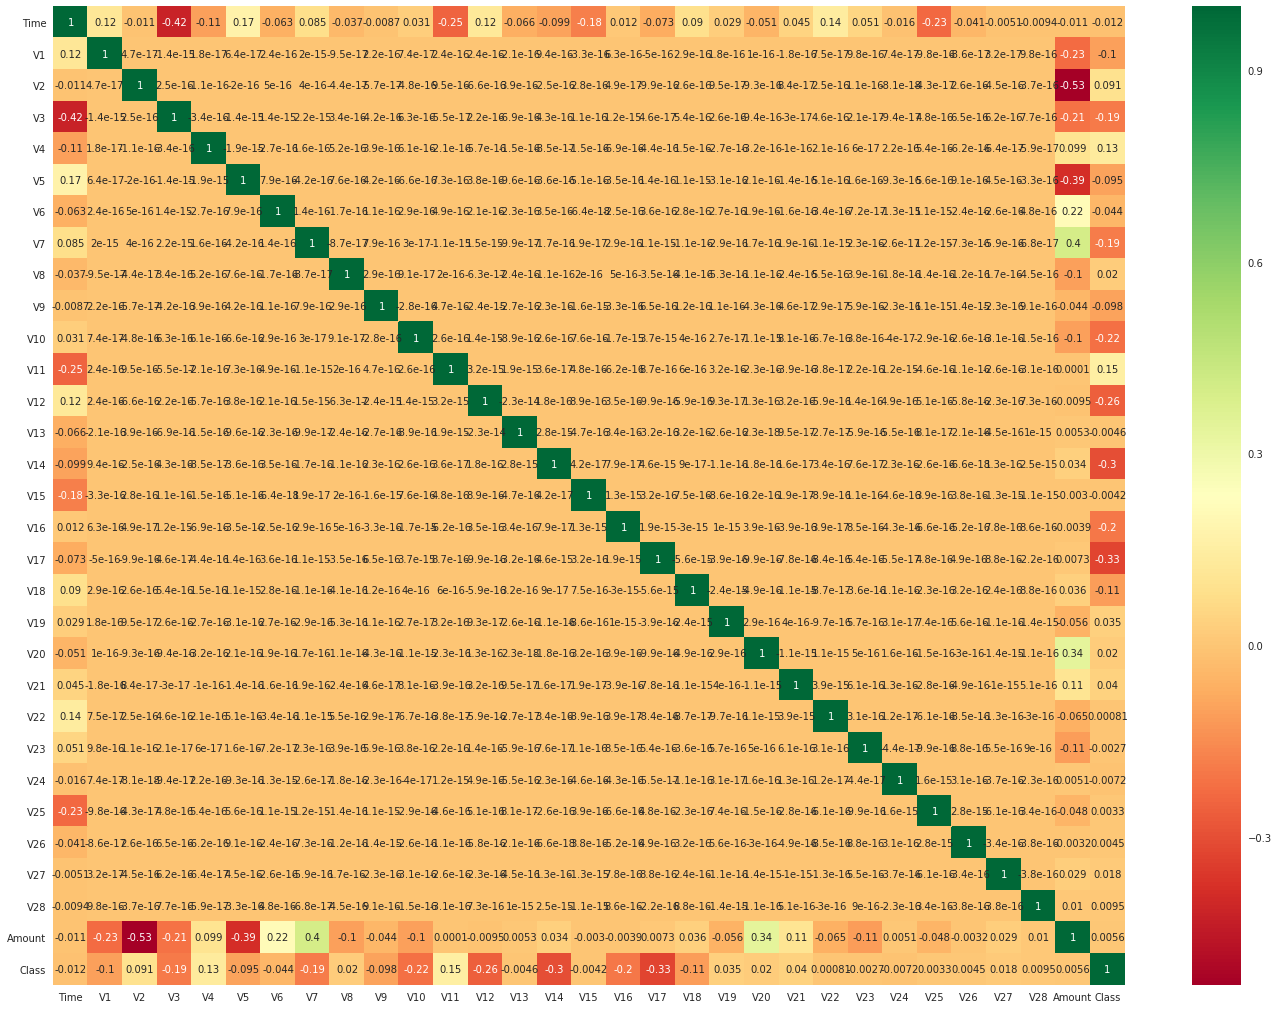

In [11]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.show()

### Inference:
- Using seaborn we can draw corelation heatmaps which are basically same as corelation matrices. 
- From the above quick analysis from heatmap, it is clear that columns from V1-V28 non correlated variables, Time and amount columns having some correlation and w.r.t PCA Variables.

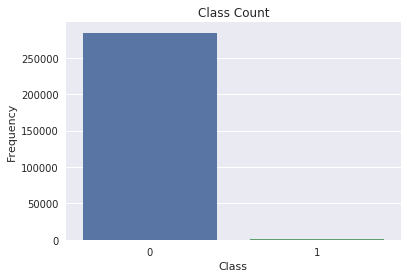

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x="Class", data=df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


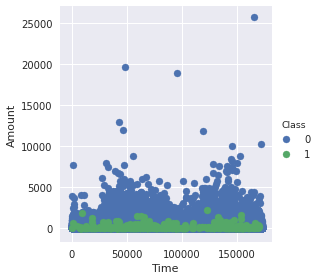

In [13]:
# Create a scatter plot to observe the distribution of classes with time and Amount

sns.FacetGrid(df, hue="Class", size = 4).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()


In [14]:
# distribution plots
Fraudulent=df[df['Class']==1]
Normal=df[df['Class']==0]

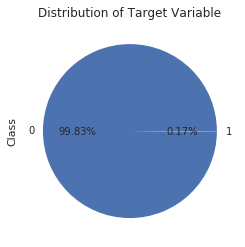

In [15]:
df['Class'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

In [16]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


### Conclusions:
- we have 492 fraudalent transactions out of 284807 total credit card transactions.
- Data is highly imblanced. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. 
- The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. 
- To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc


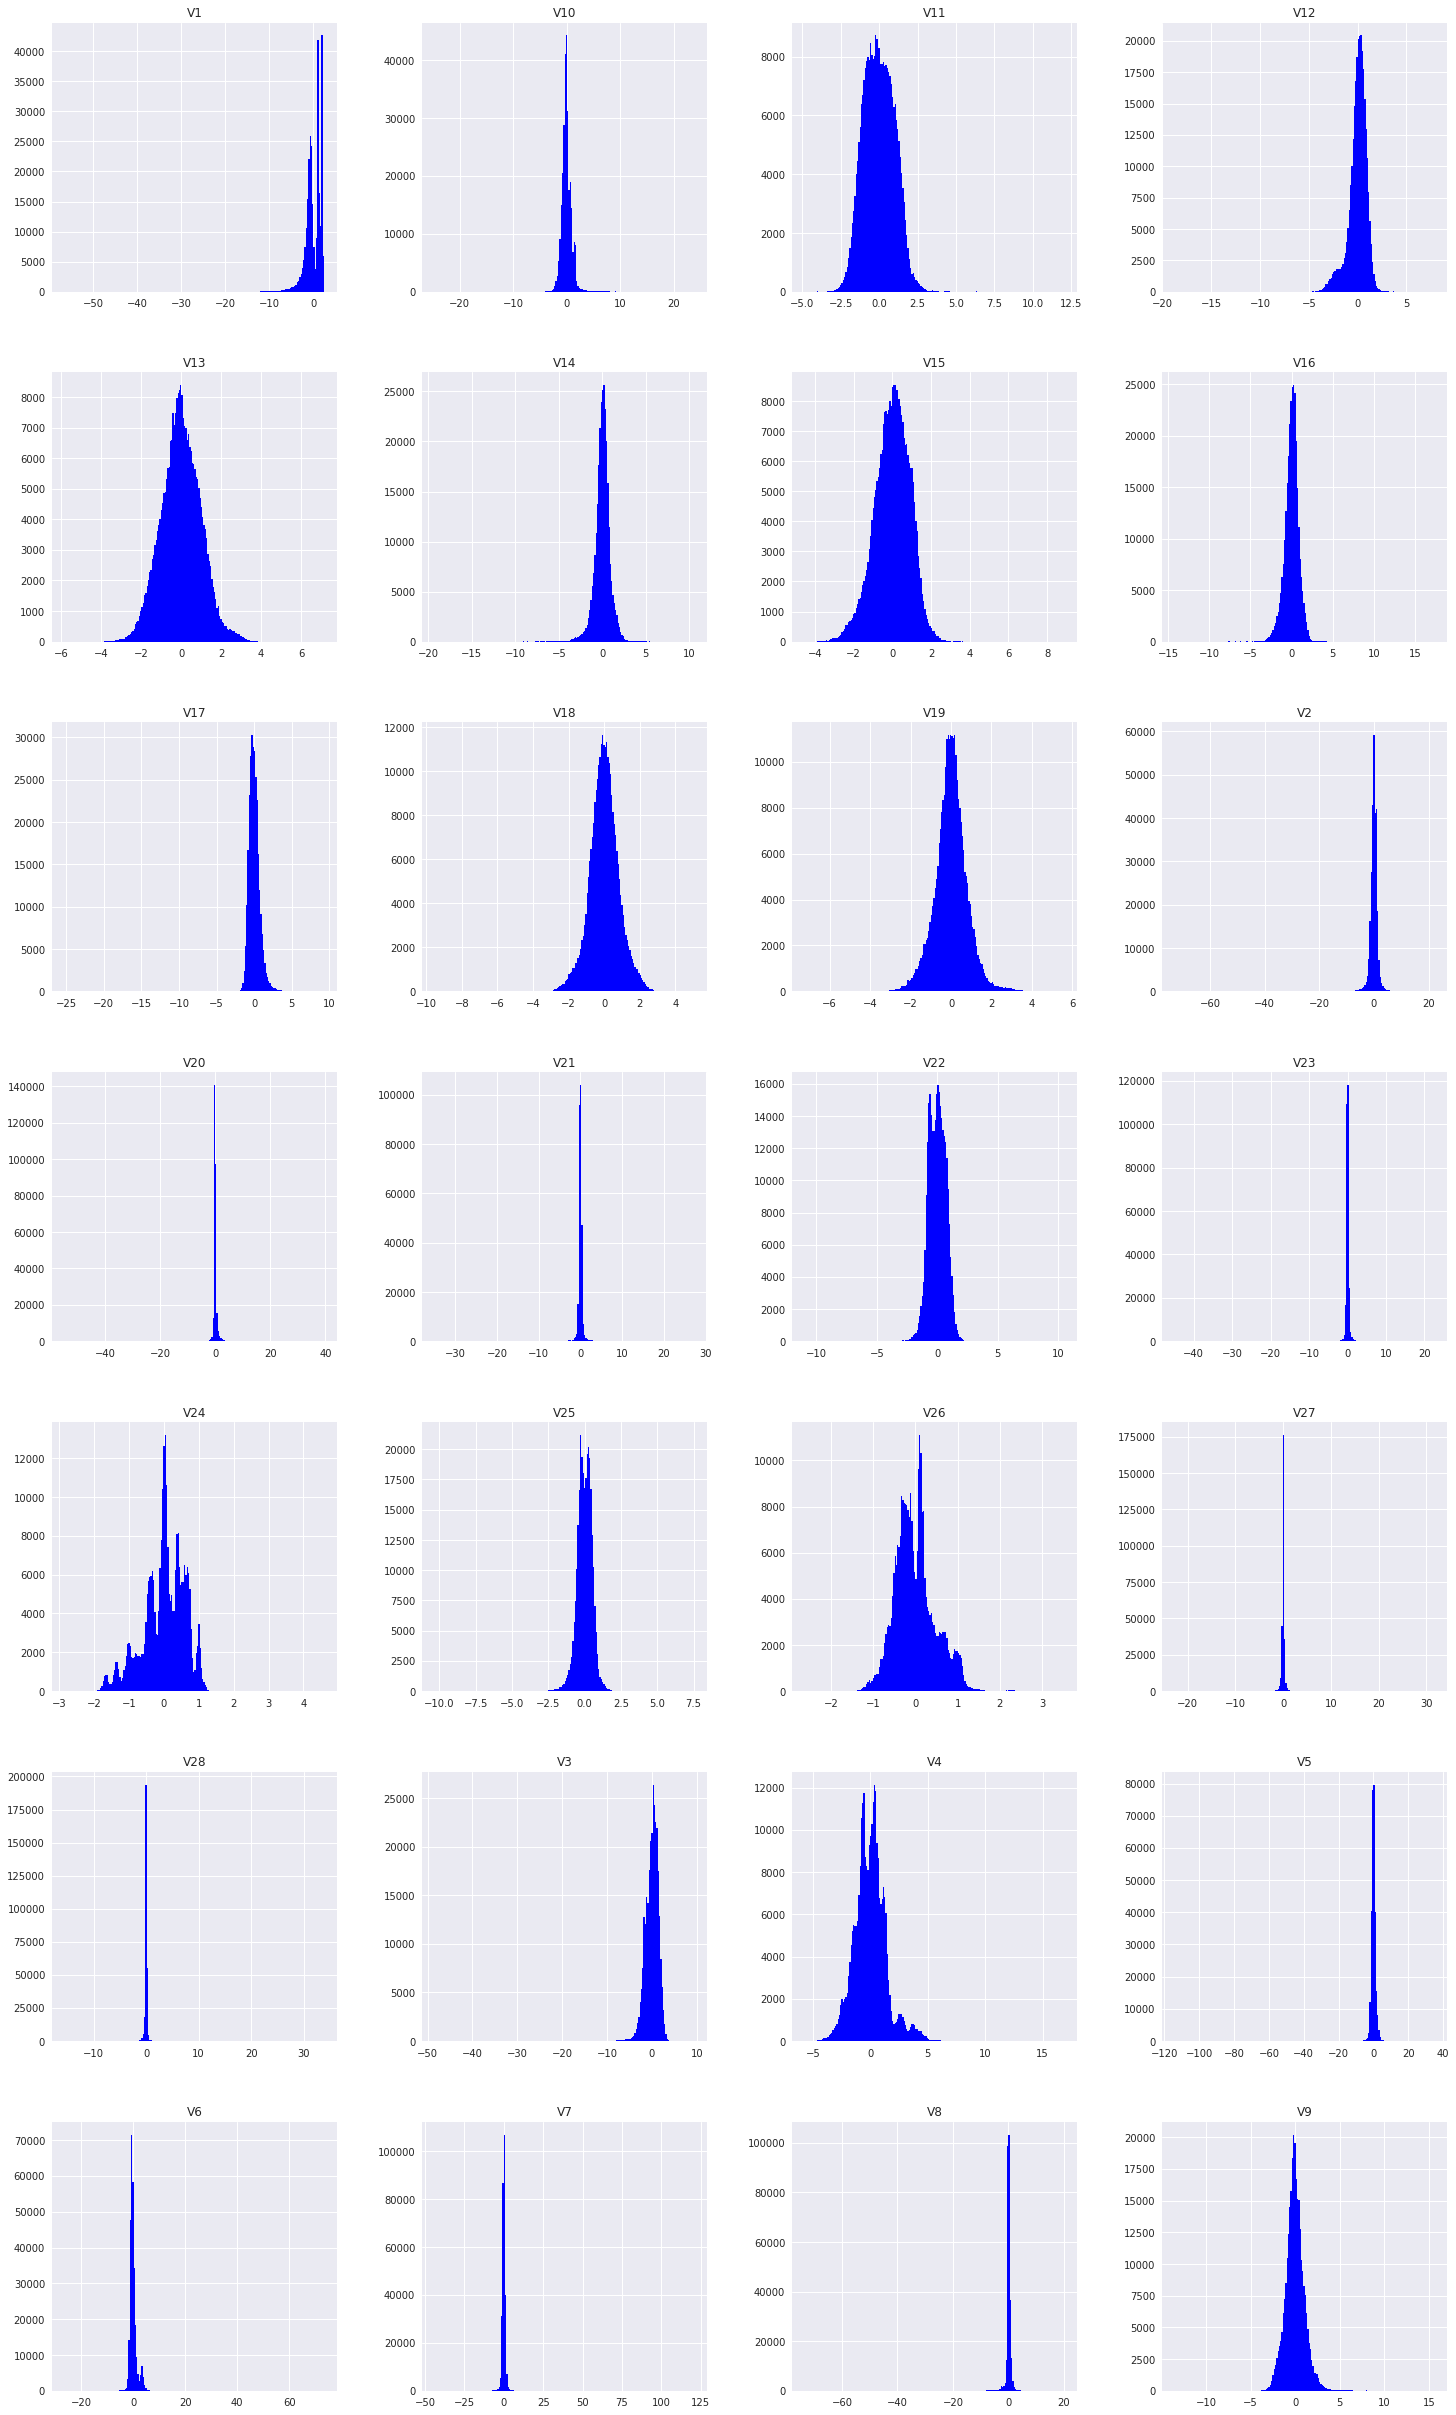

In [17]:
# lets Check the distribution of all the independent variables
df.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

### Inference: 
- By looking at the distribution of all the features we can see that there are some features whose distributions are skewed to the left, there are some features whose distributions are skewed to the right and there are some features which appears to have a normal gaussian distribution. 
- Almost all the features have their distributions mean at 0. 
- Some features like V11, V15, V13, V18, V19 has a wider spread compared to other features. 
- Some features like V6, V7, V8 and V28 have a very low spread as compared to other features.

Text(0, 0.5, 'Frequency')

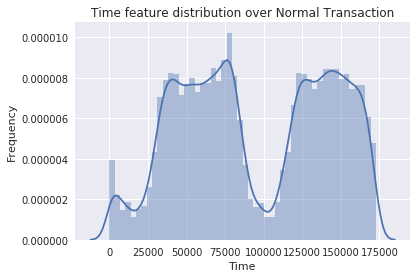

In [18]:
# plotting Time feature distribution
sns.distplot(Normal.Time)
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

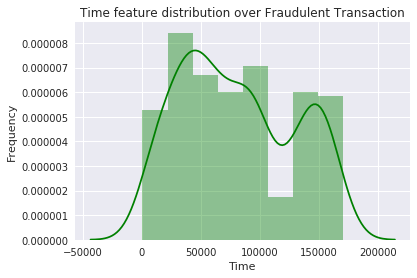

In [19]:
# plotting Time feature distribution
sns.distplot(Fraudulent.Time, color='g')
plt.title("Time feature distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

#### Summary:
On EDA of the 'Time' feature, we can see that the number of transactions falls sharply during a particular time interval. There are some regions of time where the number of transactions are very high and there some regions in time where the number of transactions are very low.

Text(0, 0.5, 'Frequency')

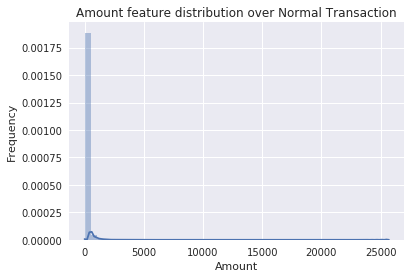

In [20]:
sns.distplot(Normal.Amount)
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")
#plt.yscale('log')

Text(0, 0.5, 'Frequency')

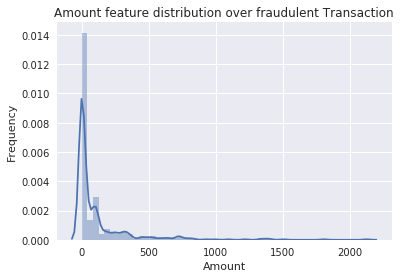

In [21]:
sns.distplot(Fraudulent.Amount)
plt.title("Amount feature distribution over fraudulent Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

#### Summary:
On EDA of the 'Amount' features, we see that the distribution is highly skewed towards the left. There are very small number of higher value transactions which happens in the course of 2 days.

In [22]:
#Let us get some basic information about the amount columns
print("The lowest transaction amount is: ",df['Amount'].min())
print("The highest transaction amount is: ",df['Amount'].max())
print("The median transaction amount is: ",df['Amount'].median())
print("The average transaction amount is: ",df['Amount'].mean())

print("\nThe lowest transaction amount for fraud transaction is: ",df[df.Class == 1]['Amount'].min())
print("The highest transaction amount for fraud transaction is: ",df[df.Class == 1]['Amount'].max())
print("The median transaction amount for fraud transaction is: ",df[df.Class == 1]['Amount'].median())
print("The average transaction amount for fraud transaction is: ",df[df.Class == 1]['Amount'].mean())

print("\nThe lowest transaction amount for non fraud transaction is: ",df[df.Class == 0]['Amount'].min())
print("The highest transaction amount for non fraud transaction is: ",df[df.Class == 0]['Amount'].max())
print("The median transaction amount for non fraud transaction is: ",df[df.Class == 0]['Amount'].median())
print("The average transaction amount for non fraud transaction is: ",df[df.Class == 0]['Amount'].mean())


The lowest transaction amount is:  0.0
The highest transaction amount is:  25691.16
The median transaction amount is:  22.0
The average transaction amount is:  88.34961925087359

The lowest transaction amount for fraud transaction is:  0.0
The highest transaction amount for fraud transaction is:  2125.87
The median transaction amount for fraud transaction is:  9.25
The average transaction amount for fraud transaction is:  122.21132113821133

The lowest transaction amount for non fraud transaction is:  0.0
The highest transaction amount for non fraud transaction is:  25691.16
The median transaction amount for non fraud transaction is:  22.0
The average transaction amount for non fraud transaction is:  88.29102242225574


#### Conclusion:
-  The mean value of the amount is about 88 bucks, whereas the median amount is about 22 bucks. The maximum amount recorded is 25691. This gives the information, about most of the transactions are relatively very small.
- Before proceeding to build ML models we will standardize values of both the time and amount features. In this way we can ensure that both the time and amount features are at scale with the remaining features.

Text(0, 0.5, 'Time')

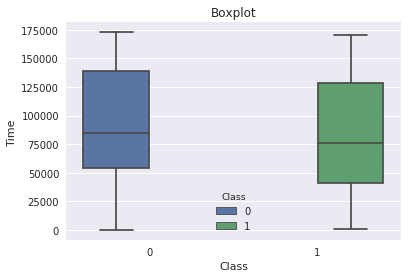

In [23]:
sns.boxplot(x='Class',y='Time',hue='Class',data=df)
plt.title("Boxplot")
plt.xlabel("Class")
plt.ylabel("Time")

Text(0, 0.5, 'Amount')

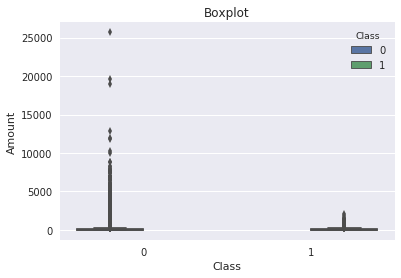

In [24]:
sns.boxplot(x='Class',y='Amount',hue='Class',data=df)
plt.title("Boxplot")
plt.xlabel("Class")
plt.ylabel("Amount")

### Treating outliers
Capping outliers in all numeric variables with k-sigma technique

In [25]:
def cap_outliers(array, k=4):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [26]:
# cap outliers in the numeric columns
numeric_cols=['Amount']
df[numeric_cols] = df[numeric_cols].apply(cap_outliers, axis=0)

Text(0, 0.5, 'Amount')

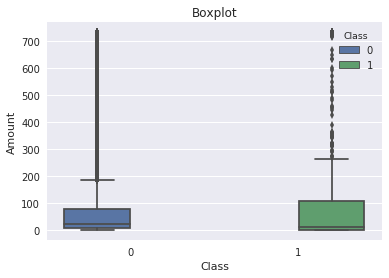

In [27]:
sns.boxplot(x='Class',y='Amount',hue='Class',data=df)
plt.title("Boxplot")
plt.xlabel("Class")
plt.ylabel("Amount")

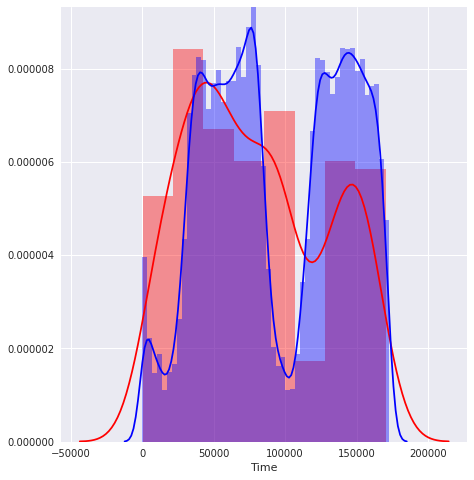

In [28]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.distplot(df[df['Class'] == 1]['Time'][0:] , label = "1", color = 'red')
sns.distplot(df[df['Class'] == 0]['Time'][0:] , label = "0" , color = 'blue' )

plt.show()

In [29]:
# Droping the time column as it doesn't contribute any importance in the dataset
df1 = df.drop(['Time'], axis = 1)

In [30]:
# Checking the columns in the dataset after removing the column
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Splitting the data into train & test data
Before building our machine learning models, we will split the dataset in such a way that 80% of the data goes to our training set and 20% data goes to our test set. 

In [31]:
# Create X and y dataset for independent and dependent data
X = df1.drop('Class', axis=1)
y = df1['Class']

In [32]:
state = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y, random_state = state)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [33]:
# Printing the number of fraud in train and test data
print("Total number of fraud: ",np.sum(y))
print("Total number of fraud in training data: ",np.sum(y_train))
print("Total number of fraud in test data: ",np.sum(y_test))

Total number of fraud:  492
Total number of fraud in training data:  394
Total number of fraud in test data:  98


In [34]:
# Checking for the skewness in each column of variable
X_train.skew()

V1       -3.306334
V2       -4.779484
V3       -2.247962
V4        0.687574
V5       -2.786851
V6        1.937381
V7        3.152665
V8       -8.639485
V9        0.541869
V10       1.132688
V11       0.354102
V12      -2.286654
V13       0.064819
V14      -1.969112
V15      -0.308419
V16      -1.077909
V17      -3.733377
V18      -0.254948
V19       0.106133
V20      -1.960492
V21       3.490183
V22      -0.219171
V23      -6.258558
V24      -0.549854
V25      -0.436292
V26       0.574980
V27      -0.890209
V28       9.978409
Amount    3.137557
dtype: float64

### Plotting the distribution of variables/Treating skewness of variables

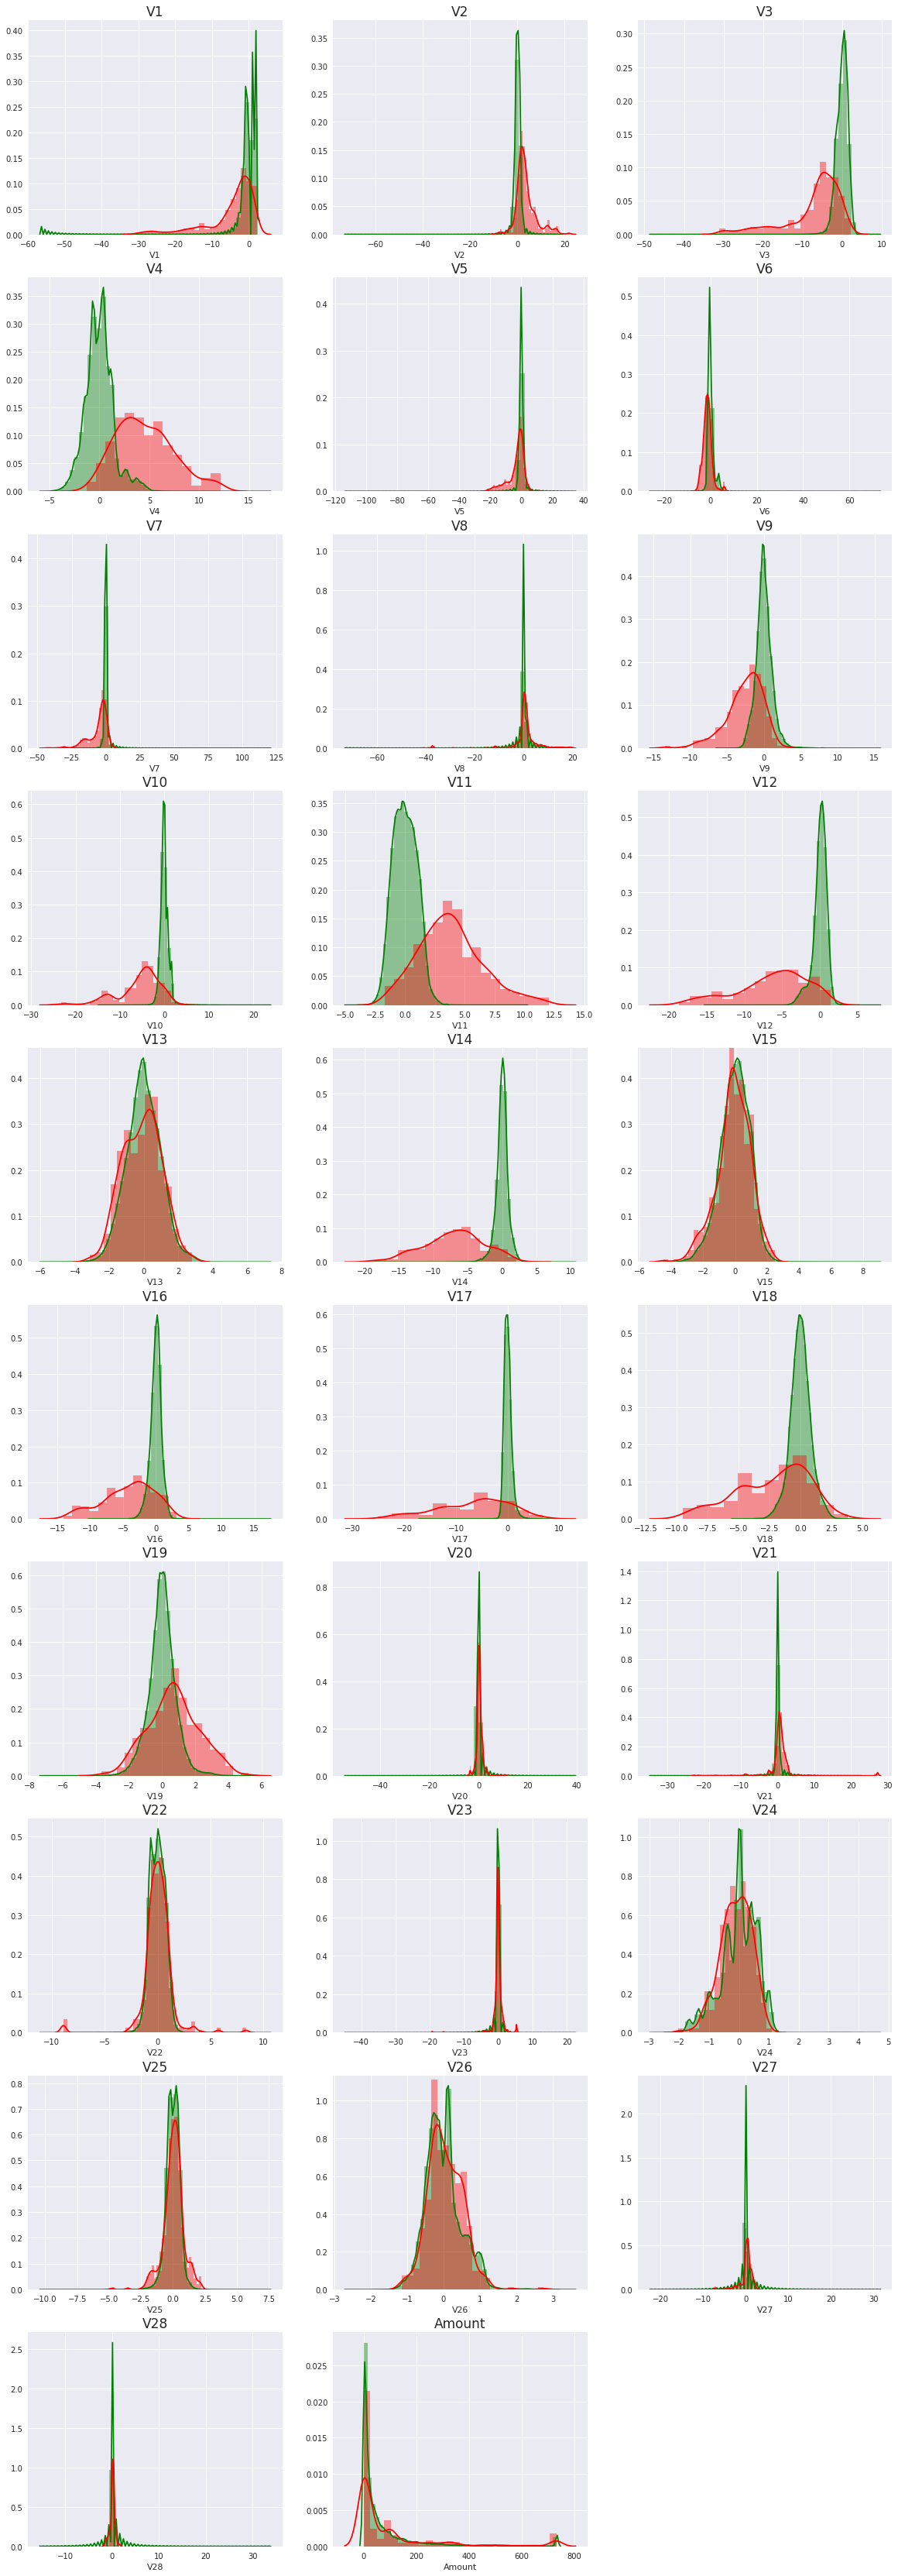

In [35]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)

normal_records = df1.Class == 0
fraud_records = df1.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

#### If there is skewness present in the distribution use:
- Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [36]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [37]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

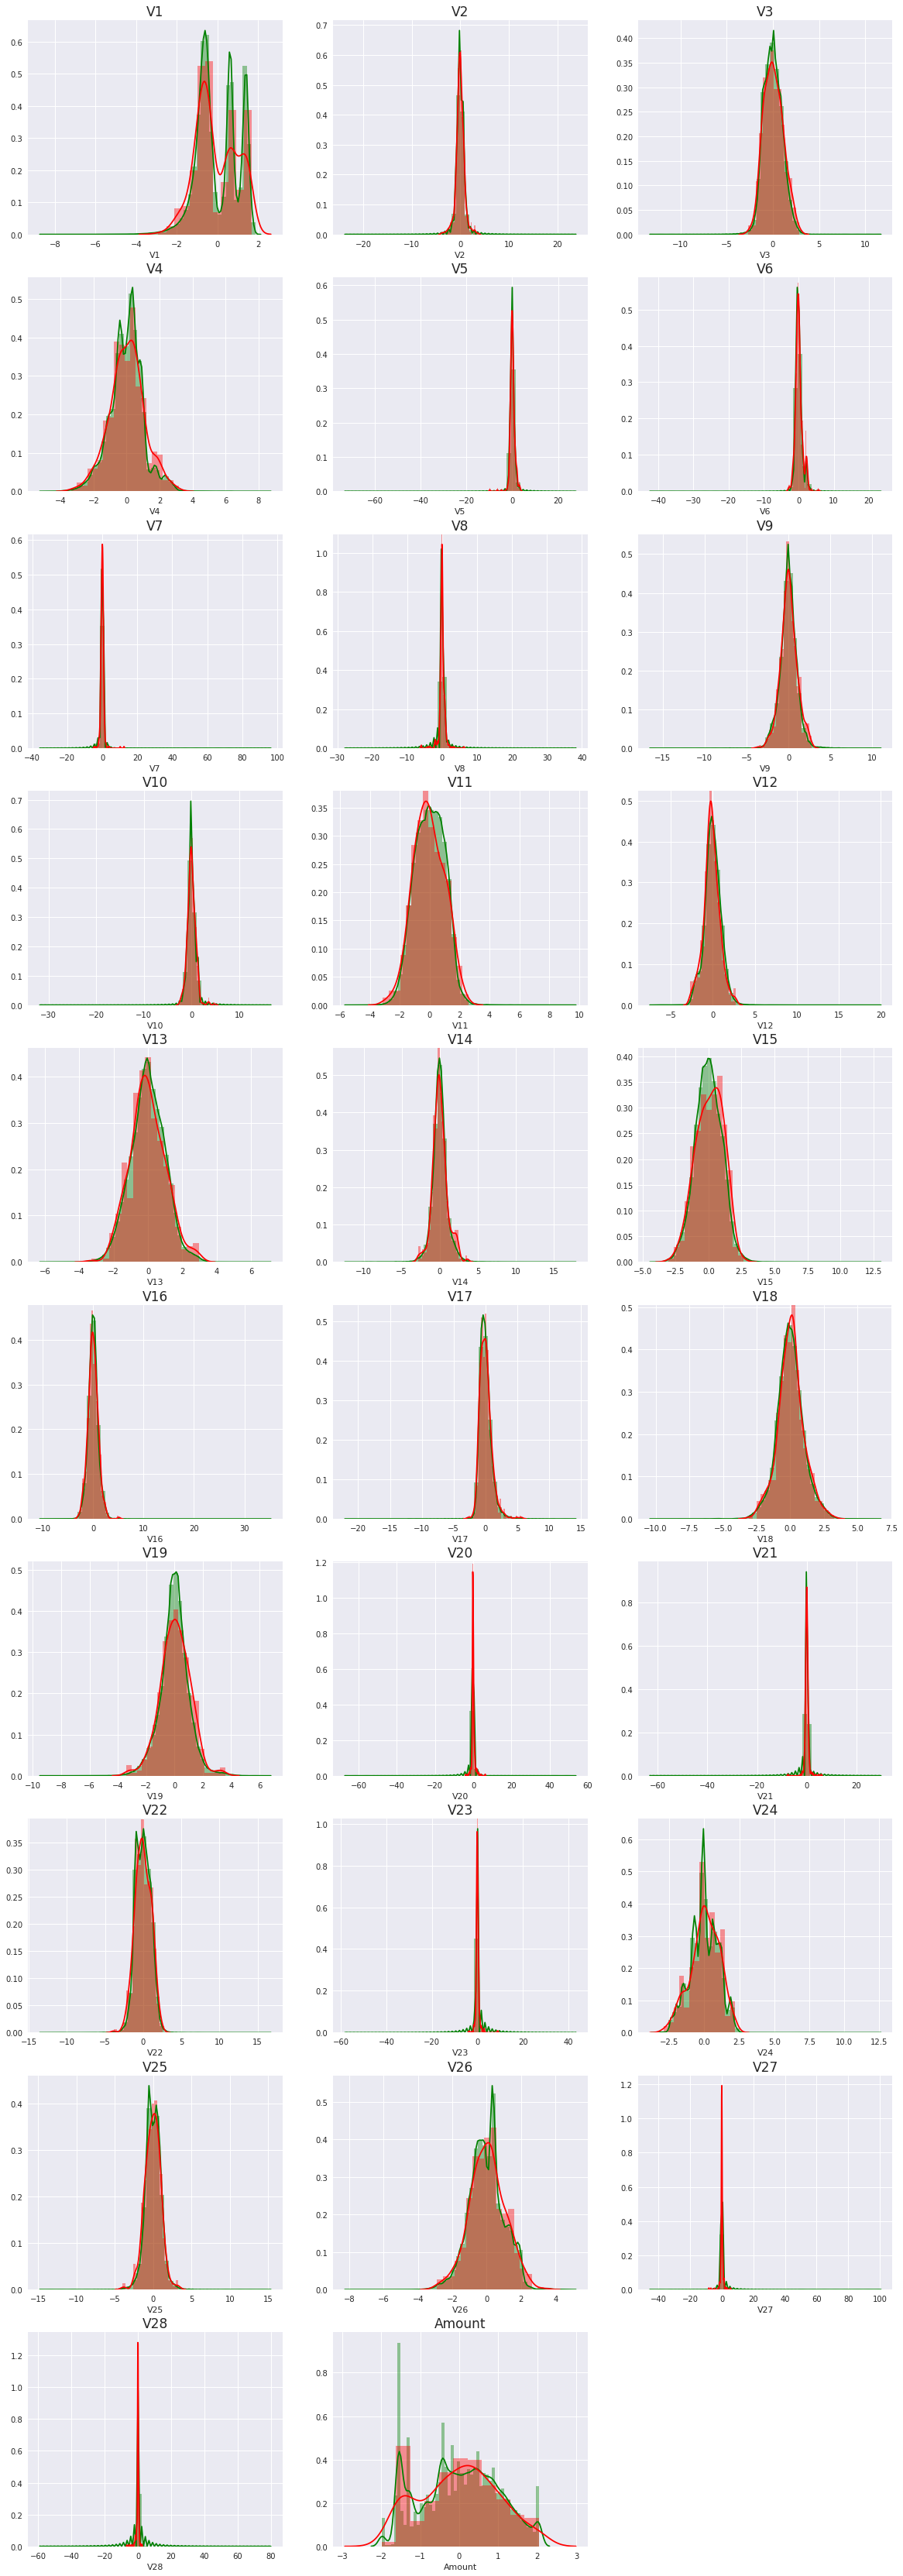

In [38]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

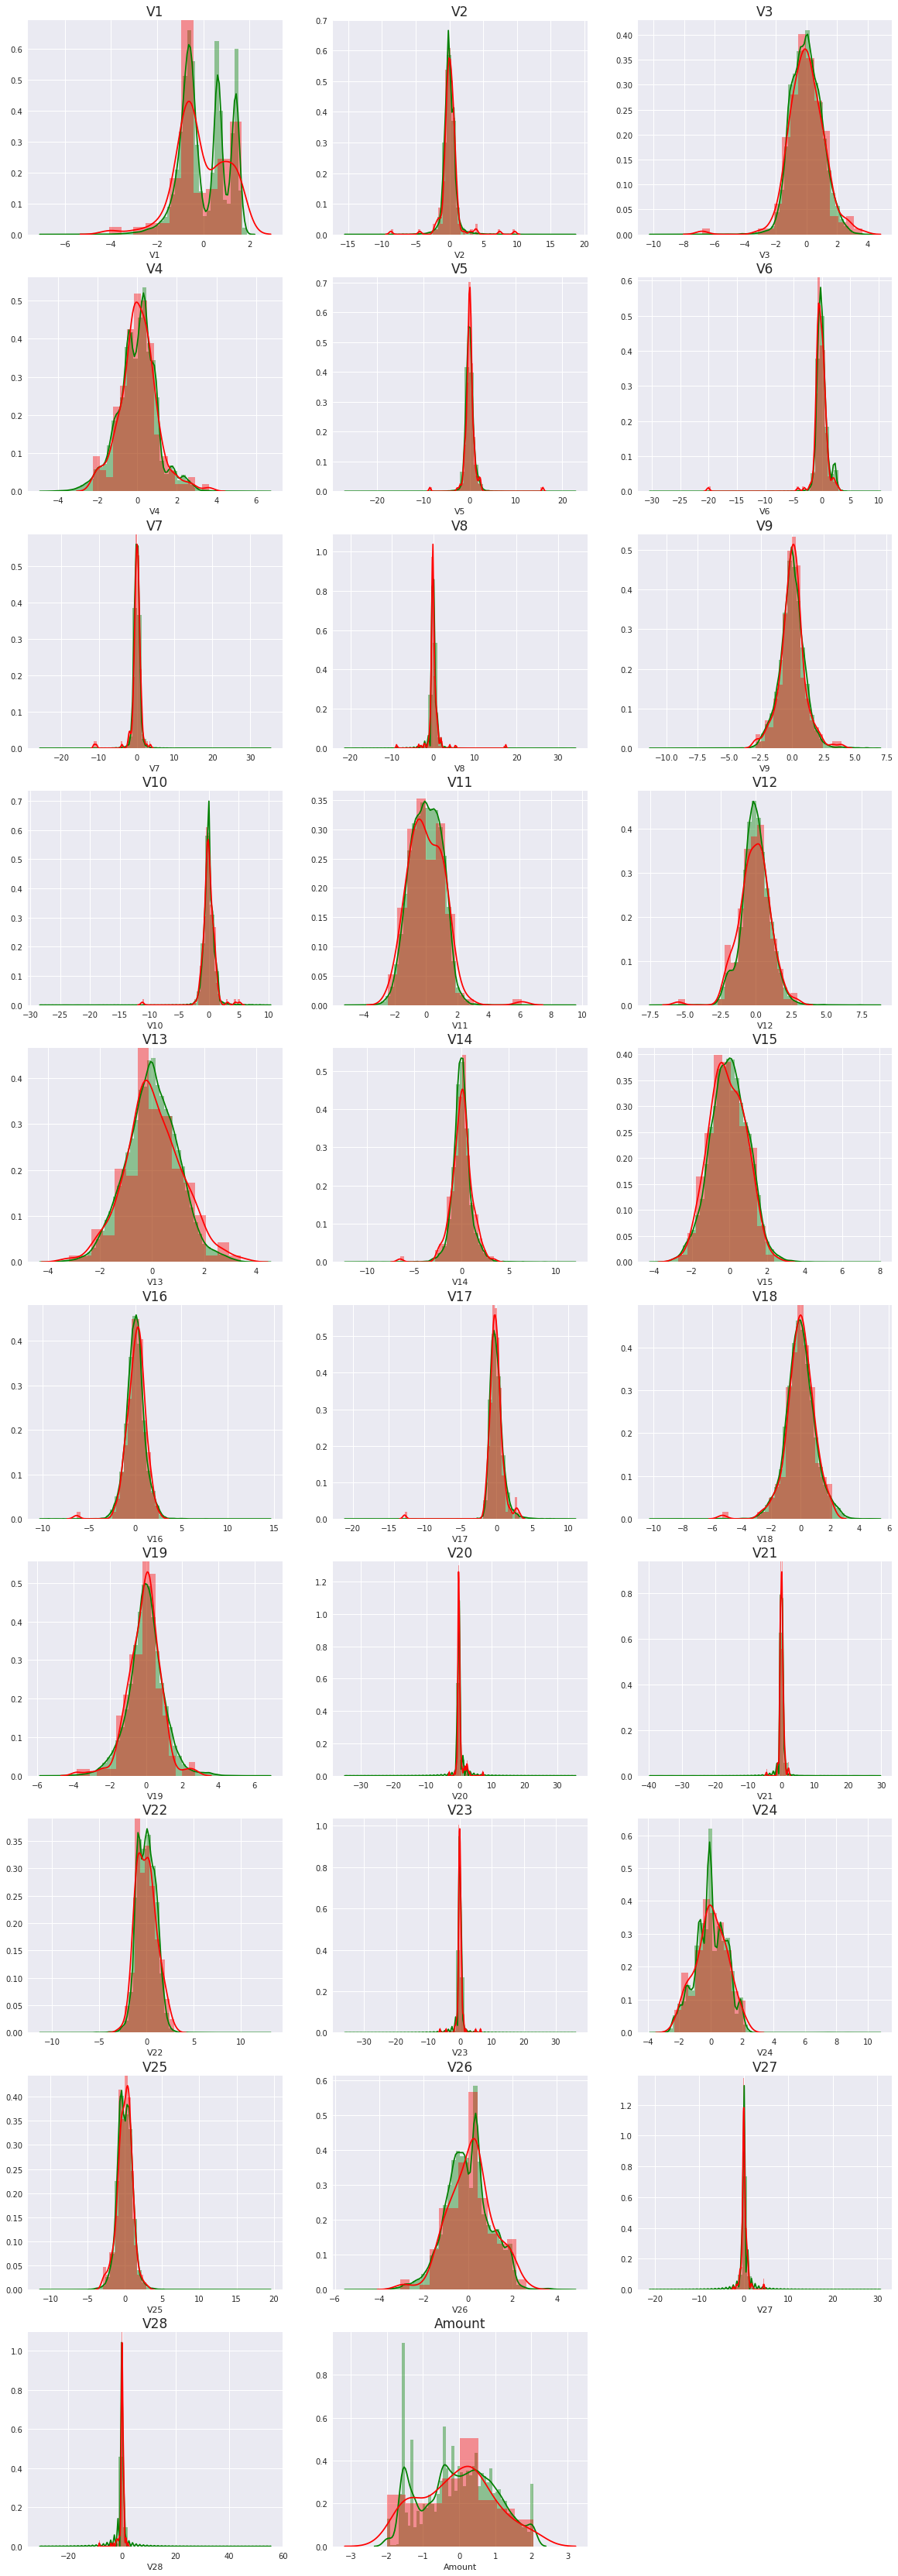

In [39]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [40]:
# Again Checking for the skewness in each column of variable
X_train_pt_df.skew()

V1       -0.218136
V2        0.336876
V3       -0.079701
V4        0.019656
V5       -1.349420
V6       -2.001738
V7        2.883669
V8        2.382707
V9       -0.049934
V10      -1.329089
V11       0.062098
V12       0.162452
V13       0.006358
V14       0.101347
V15       0.013679
V16       0.156780
V17      -0.805442
V18      -0.058739
V19       0.015386
V20      -0.879795
V21      -2.076984
V22      -0.027718
V23      -0.255033
V24       0.113940
V25       0.076555
V26      -0.024692
V27       3.731696
V28       1.320689
Amount    0.012276
dtype: float64

### Conclusion:
- Here we could see that skewness of the variables have been reduced.

### Summary from EDA
- High-class imbalance (Out of a total of 2,84,807 transactions, 492 were fraudulent)
    - 99.827% is normal transactions and 0.173% is fraud transactions.
    - Needed to use class imbalance techniques like Random oversampling, SMOTE and ADASYN.
    - The appropriate metric for the best model is ROC-AUC.


- From the Time and Amount features, most likely this data set from local bank. So that might be a good option to choose best precision model out of same value of best F1 score models.
    - Precision: whatever model predicts as fraud; it is a fraud. (Reduced miss classification of normal transactions)
    - Recall: Whatever fraud is happening; model catches more often. (Reduced miss classification of fraud transactions)
    - Reason choose Precision over recall from the best F1 score models:
        - The expenses to hire employees to verify the miss classification of normal transactions manually is higher than the loss from frauded transactions in most of the cases for local bank, we can see the transaction amounts are very small in amounts. Suppose in case of international bank the transactional amounts expected to be higher as will fraud case, So in that case, we must consider recall with high priority over precision. What ever the case, the difference between precision & recall must not be very big. This why, we choose models in a flowing hierarchy. Best ROC_AUC --> Best F1-Score --> Precision.


- List of models can try to get the best model:
    - Logistic regression:Might not helpful since the data is not much linearly separable, but we can experiment to check the model results.
    - K-Nearest Neighbor:Need a lot of computation, not recommended for large datasets, but try once to see the performance.
    - Support vector machine:Need a lot of computation, not recommended for large datasets, but try once to see the performance.
    - Decision tree:chances are high to get overfit, but with proper tunings possibly can get good model and with ensemble of decision trees will give even better results.
    - Random forest:This is ensembles of decision trees with an iterative way of adding weak learners to form the final model, expecting best results from this classification model.
    - XGBoost:Fast in learning, because of parallel processing. This works on reducing loss function. And an extended version of gradient boosting. Expecting best results from this classification as well.


- Hyperparameters tuning:
    - Use GridSearchCV or RandomSearchCV with StratifiedKFold, to find the best hyperparameters for the model.
        - RandomSearchCV is the best option when we have a large dataset, but not guaranteed the best results.
        - Prefer StratifiedKFold over K-Fold, especially in such a case of imbalanced data stratification ensures that each fold is representative of all the strata of the data.

### Model Building

#### Now we are creating some functions which we will use again and again in the program

#### Function to plot Confusion Matrix, Precision Matrix, Recall Matrix
We will use this function to draw the confusion matrix, precision matrix and the recall matrix. We will use the confusion matrix to keep an eye on the false positive values and the recall values. Our main objective of this case study is to build a model which has a high recall value.

Confusion Matrix is a tool which helps us to evaluate the performance of our classification model on unseen data. It's a very important tool to evaluate metrics such as Precision, Recall, Accuracy and Area under the ROC curve using these four values - False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN).

Ideally, for a perfect model, we would want the values of TPs and TNs to be very high and our FPs and FNs to be very low. Also, for this problem it's an absolute necessity to keep the False Negative values as low as possible. In the real world Type 2 errors are much more sever than Type 1 errors. Imagine this scenario - our model predicts a fraudulent transaction as a non fraudulent one. This is much more severe than predicting a non-fraudulent transaction as a fraudulent one.

Recall tells us that out of the total number of actual/correctly classified classes how many did our model predicted to belong to the correctly classified class?

Precision tells us that out of the total number of predictions how many of them are actually predicted to be true?

In [41]:
# Creating a function for confusion matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    cmap=plt.cm.Blues #sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### Function to plot the ROC-AUC Curve
ROC curve stands for Receiver operating characteristic curve. In machine learning, ROC curves helps us evaluate our models performance at various threshold settings. ROC curves is a probability curve and AUC stands for the area under the ROC curve. Generally a ROC-AUC curves gives us an idea about how well our model is capable of distinguishing between various class labels. IN ROC-AUC curve, the value of the true positive rates and false positive rates are plotted against each other at various threshold settings. Higher the value of an ROC-AUC curve, the better will be our model in predicting a class 0 label as class 0 and class 1 label as class 1. For this case study, class 1 signifies a fraudulent transaction and class 0 signifies a non-fraudulent transaction.

While plotting the ROC-AUC curve, the TPR is taken in Y-Axis and the FPR is taken at X-axis. TPR is also known ans Recall. Mathematically TPR is defined as (TP/TP+FN), and FPR is defined as (FP/TN+FP). We will have to optimize our Machine Learning models such that they maximize the ROC-AUC score.

In [42]:
#This function is used to plot the ROC curve on both train and test.
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(10,8))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### Generic function to run any model and print the classification metrics
This function is used to evaluate our model on unseen data. We will first obtain the best estimator using either grid search or random search. We will use the best estimator from our model to print the roc-auc scores, the accuracy scores, the recall score and the f1 score. F1 score as we know is the harmonic mean between precision and recall scores. We will also use this function to generate the classification report for each of our models.

In [43]:
## this function is used to display the model report, to get the best F1 score, Recall, Accuracy, ROC-AUC score
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    trained_model = model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    #Getting the accuracy of train and test data
    pred_m_train = trained_model.predict(X_train)
    pred_m_test = trained_model.predict(X_test)
    pred_prob_m_train = trained_model.predict_proba(X_train)[:,1]
    pred_prob_m_test = trained_model.predict_proba(X_test)[:,1]
    accuracy_train = metrics.accuracy_score(y_train, pred_m_train)
    accuracy_test = metrics.accuracy_score(y_test, pred_m_test)
    print('Accuracy in train dataset:', accuracy_train)
    print('Accuracy in test dataset:', accuracy_test)
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score)) 
    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

#### Generic function to print grid/random search results/attributes
This function will be used to print the best estimator obtained using grid search/random search. For each estimator, we will print the best parameters for a given function along with their best scores on the cross validation dataset.

In [44]:
# to print the best grid search parameters
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

### 1. Model building on Imbalanced Dataset

#### 1.1 Logistic Regression Classifier

In [45]:
# importing some libraries required for running the regression 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt

In [46]:
## building the regression model, we are using the grid search method to get the best combination of values, C values used for cross validation
st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } 

model = LogisticRegression(n_jobs=-1, random_state= state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state= state)
rsearch_cv.fit(X_train_pt_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.4s finished


Time taken to complete random search:  0:00:12.818100


In [47]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.05179474679231207, n_jobs=-1, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.05179474679231207}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9802458554563236



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:04.316440


Accuracy in train dataset: 0.9992802124251136
Accuracy in test dataset: 0.9991924440855307
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.003697


---------------------
|      F1 Score      |
---------------------

    0.9991924440855307


---------------------
|      Accuracy      |
---------------------

    0.9991924440855307


---------------------
|      Recall        |
---------------------

    0.673469387755102


---------------------
|      ROC AUC       |
---------------------

    0.9706390399434958


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.67      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84     

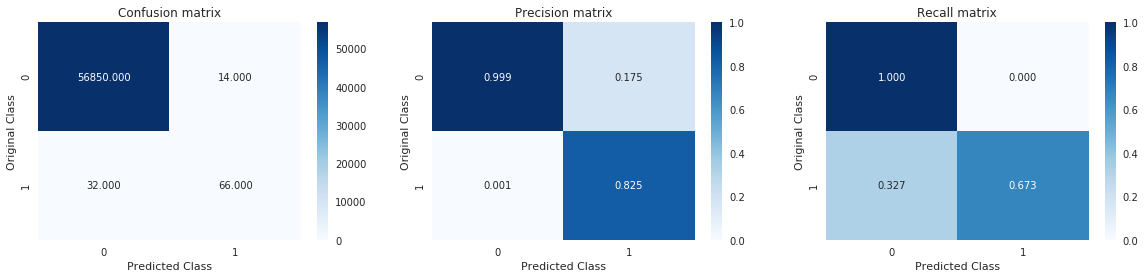

In [48]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
from sklearn.calibration import CalibratedClassifierCV
log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_train_pt_df, y_train, X_test_pt_df, y_test, class_labels=y_train.values)

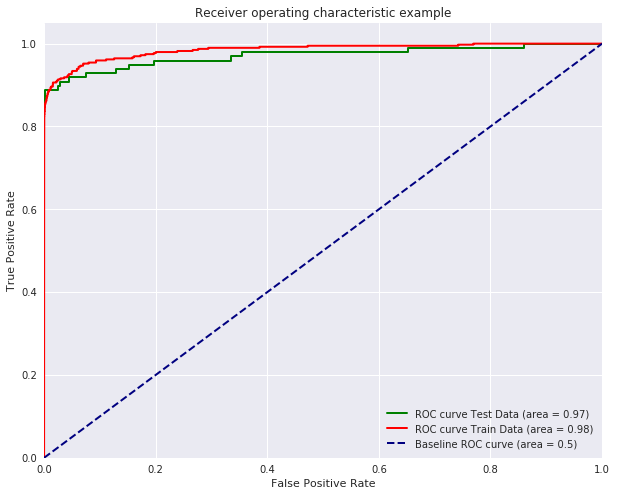

In [49]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train_pt_df, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train_pt_df, y_train, X_test_pt_df, y_test)

#### 1.2 Decision Trees Classifier

In [50]:
## Building an Decision Tree model
from sklearn.tree import DecisionTreeClassifier
st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train_pt_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.7s finished


Time taken to complete random search:  0:00:14.349660


In [51]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=3, min_samples_split=0.5,
                       random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9506520686718154



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.526330


Accuracy in train dataset: 0.9982707542408216
Accuracy in test dataset: 0.9982795547909132
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.007038


---------------------
|      F1 Score      |
---------------------

    0.9982795547909132


---------------------
|      Accuracy      |
---------------------

    0.9982795547909132


---------------------
|      Recall        |
---------------------

    0.0


---------------------
|      ROC AUC       |
---------------------

    0.960768012185178


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962

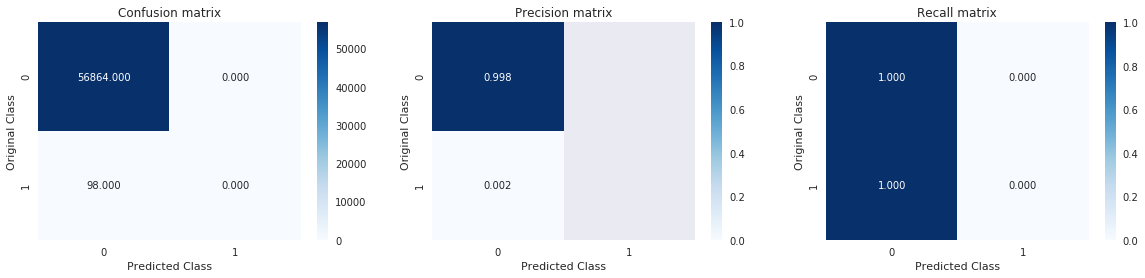

In [52]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train_pt_df, y_train, X_test_pt_df, y_test, class_labels=y_train)

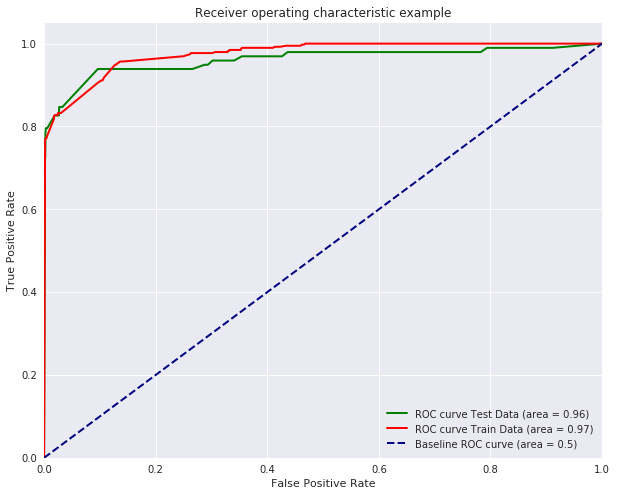

In [53]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train_pt_df, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train_pt_df, y_train, X_test_pt_df, y_test)

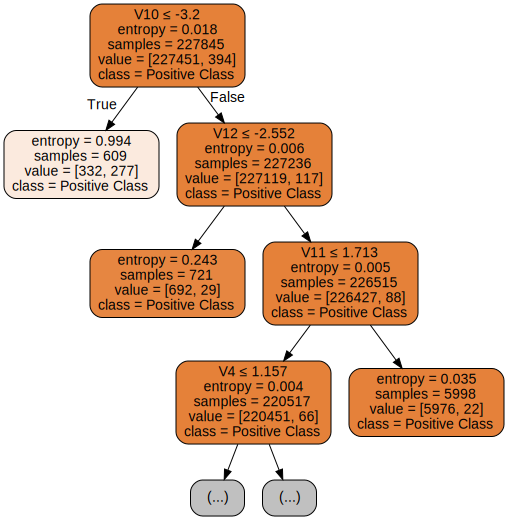

In [54]:
# Visualizing the decision Tree
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

#### 1.3 Random Forest Classifier

In [54]:
# Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[6,7,8,9],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5], 
                    'max_features':['auto','sqrt'],
                    'min_samples_leaf':[10, 25, 50, 75],
                    'n_estimators':[5,30,50,80,100],
                    'max_leaf_nodes':[50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train_pt_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.1min finished


Time taken to complete random search:  0:14:15.407225


In [55]:
## printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score 
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=50,
                       min_samples_leaf=10, min_samples_split=3,
                       random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_leaf_nodes': 50, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9811756787774917



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:02:06.067158


Accuracy in train dataset: 0.9995479382913823
Accuracy in test dataset: 0.9995611109160493
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.365519


---------------------
|      F1 Score      |
---------------------

    0.9995611109160493


---------------------
|      Accuracy      |
---------------------

    0.9995611109160493


---------------------
|      Recall        |
---------------------

    0.7959183673469388


---------------------
|      ROC AUC       |
---------------------

    0.9754735250881444


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90    

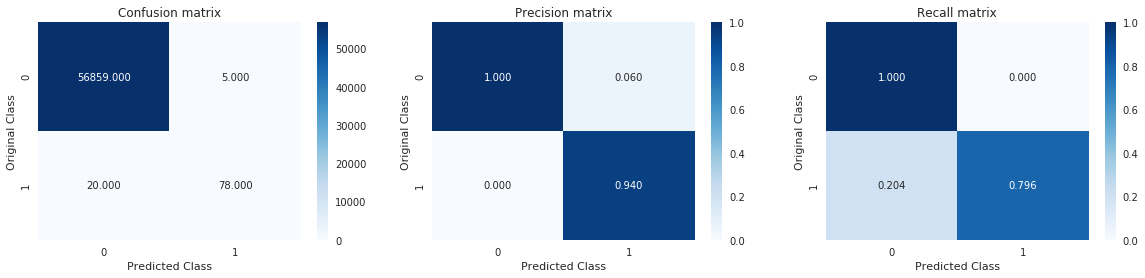

In [56]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train_pt_df, y_train, X_test_pt_df, y_test, class_labels=y_train)

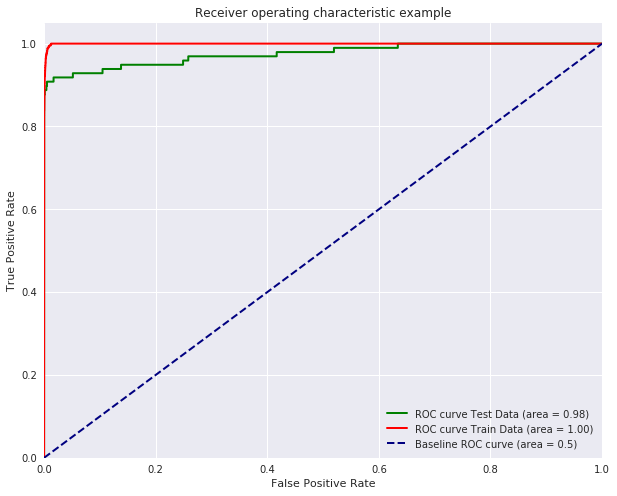

In [57]:
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train_pt_df, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train_pt_df, y_train, X_test_pt_df, y_test)

#### 1.4. XGBoost Classifier

In [59]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=state)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train_pt_df, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 115.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 115.6min finished


Time taken to complete random search:  2:07:06.646315


In [60]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score 
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 2000, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
---

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:12:16.955848


Accuracy in train dataset: 0.9996883846474577
Accuracy in test dataset: 0.9996313331694814
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:02.453231


---------------------
|      F1 Score      |
---------------------

    0.9996313331694814


---------------------
|      Accuracy      |
---------------------

    0.9996313331694814


---------------------
|      Recall        |
---------------------

    0.8061224489795918


---------------------
|      ROC AUC       |
---------------------

    0.9862154097711116


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90    

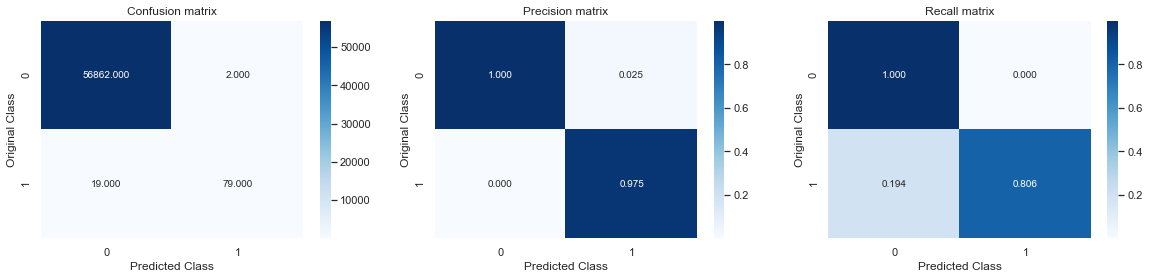

In [61]:
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train_pt_df, y_train, X_test_pt_df, y_test, class_labels=y_train.values)

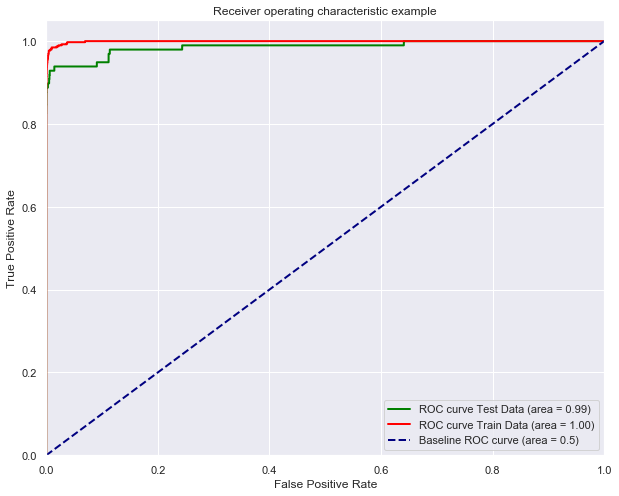

In [62]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train_pt_df, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train_pt_df, y_train, X_test_pt_df, y_test)

In [63]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 99.92%          62.24%       0.9789
Decision Trees Classifier  : 99.83%          0.0%       0.9629
Random Forest Classifier   : 99.93%           68.37%       0.9789
XGBoost Classifier         : 99.96%          80.61%       0.9862


### Summary from Models build on Imbalanced Data/No Sampling:
#### Build different models on the imbalanced dataset now lets see the results

1. Logistic Regression --
    
    - Accuracy: Train - 99.92% , Test - 99.91%
    - Recall: 67.34%
    - F1 Score: 99.91%
    - ROC AUC: 97.06 %
    - AUC: Train - 0.98 ,test- 0.97


2. Decision Tree -- 
    
    - Accuracy: Train - 99.82% , Test - 99.82%  
    - Recall: 0.0
    - F1 Score: 99.82% 
    - ROC AUC: 96.07 %
    - AUC: Train - 0.97 ,test- 0.96


3. Random Forest -- 
   
    - Accuracy: Train - 99.95% , Test - 99.95%  
    - Recall: 79.59 %
    - F1 Score: 99.92%
    - ROC AUC: 97.54
    - AUC: Train - 1 ,test- 0.98
    

4. XGboost --
    
    - Accuracy: Train - 99.96% , Test - 99.96%
    - Recall: 80.61% 
    - F1 Score: 99.96%
    - ROC AUC: 98.61%
    - AUC: Train - 1 ,test- 0.99

### 2. Model building with balancing Classes
#### Perform class balancing with :

- Random Oversampling
- SMOTE
- ADASYN

#### 2.1 Random Oversampling
####  Sample the Imbalanced data using Random oversampling

In [58]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [59]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_rantrain,y_rantrain=oversample.fit_resample(X_train_pt_df,y_train)

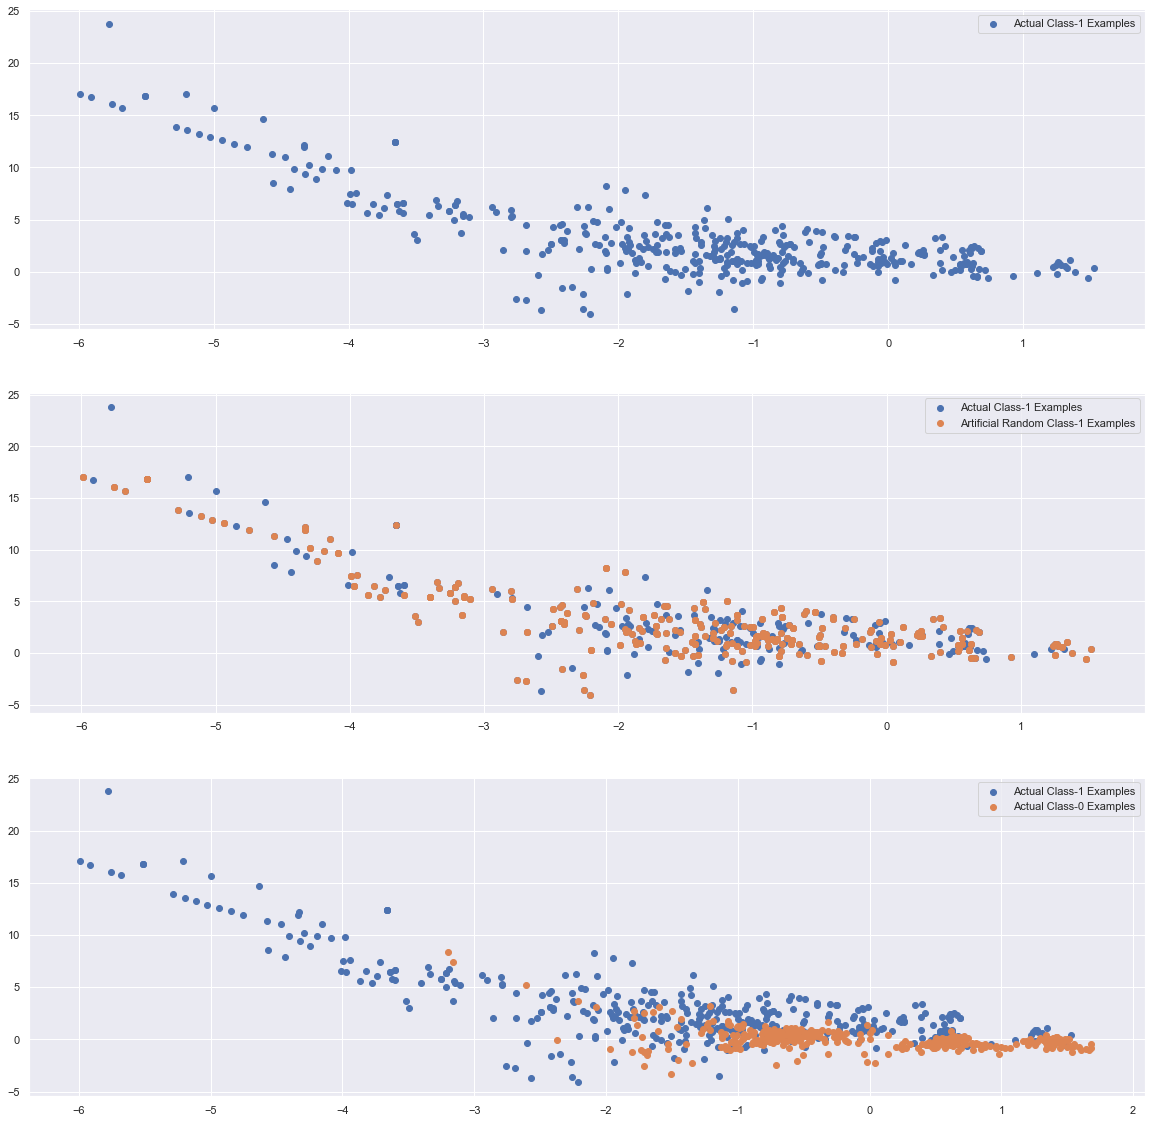

In [128]:
X_rantrain_1 = X_rantrain[X_train_pt_df.shape[0]:].values

X_train_1 = X_train_pt_df.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt_df.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_rantrain_1[:X_train_1.shape[0], 0], X_rantrain_1[:X_train_1.shape[0], 1],
            label='Artificial Random Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [60]:
y_train.shape

(227845,)

#### 2.1.1 Logistic Regression Model

In [61]:
## building the regression model, we are using the grid search method to get the best combination of values, C values used for cross validation
st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } 

model = LogisticRegression(n_jobs=-1, random_state= state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state= state)
rsearch_cv.fit(X_rantrain, y_rantrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished


Time taken to complete random search:  0:00:23.862902


In [62]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=71.96856730011514, n_jobs=-1, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 71.96856730011514}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9886326547099095



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:09.586851


Accuracy in train dataset: 0.9514928490092371
Accuracy in test dataset: 0.9722797654576736
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.004428


---------------------
|      F1 Score      |
---------------------

    0.9722797654576736


---------------------
|      Accuracy      |
---------------------

    0.9722797654576736


---------------------
|      Recall        |
---------------------

    0.9183673469387755


---------------------
|      ROC AUC       |
---------------------

    0.9730981834208078


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95    

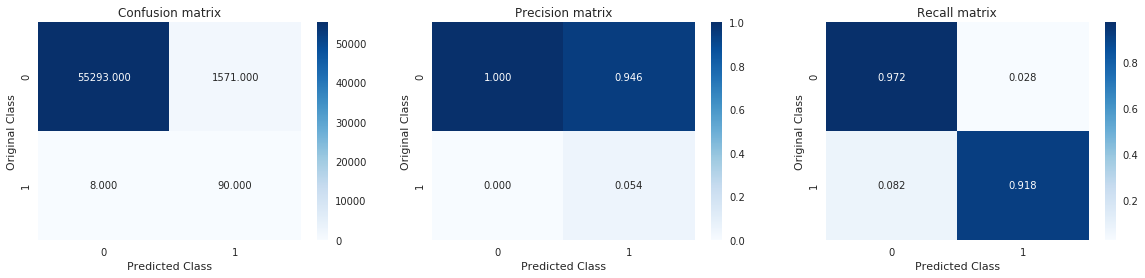

In [63]:
from sklearn.calibration import CalibratedClassifierCV
log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_rantrain, y_rantrain, X_test_pt_df, y_test, class_labels= y_rantrain.values)

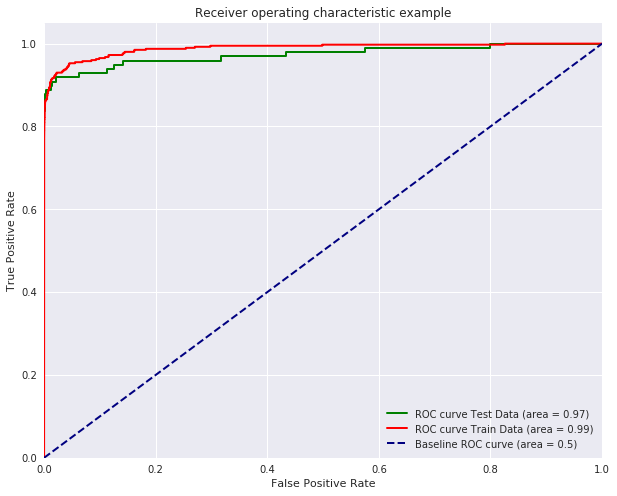

In [64]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_rantrain, y_rantrain)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_rantrain, y_rantrain, X_test_pt_df, y_test)

#### 2.1.2. Decision Tree model

In [65]:
from sklearn.tree import DecisionTreeClassifier
st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_rantrain, y_rantrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.5s finished


Time taken to complete random search:  0:00:14.865124


In [66]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.30000000000000004, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9740610744790448



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.320162


Accuracy in train dataset: 0.9216996188189984
Accuracy in test dataset: 0.8991432885081282
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.006388


---------------------
|      F1 Score      |
---------------------

    0.8991432885081282


---------------------
|      Accuracy      |
---------------------

    0.8991432885081282


---------------------
|      Recall        |
---------------------

    0.9081632653061225


---------------------
|      ROC AUC       |
---------------------

    0.9399626426963583


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.90    

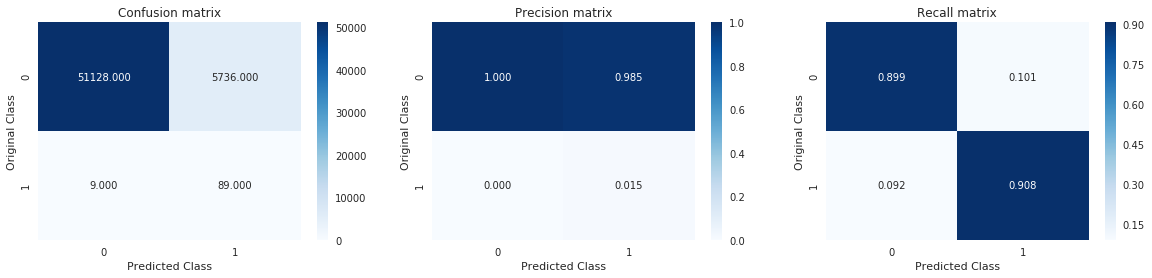

In [67]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
dt_grid_results, trained_model =  model_report(rsearch_cv, X_rantrain, y_rantrain, X_test_pt_df, y_test, class_labels= y_rantrain)

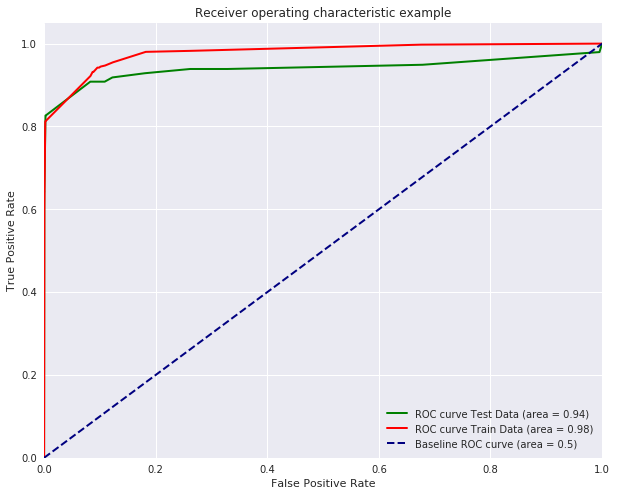

In [68]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit( X_rantrain, y_rantrain)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_rantrain, y_rantrain, X_test_pt_df, y_test)

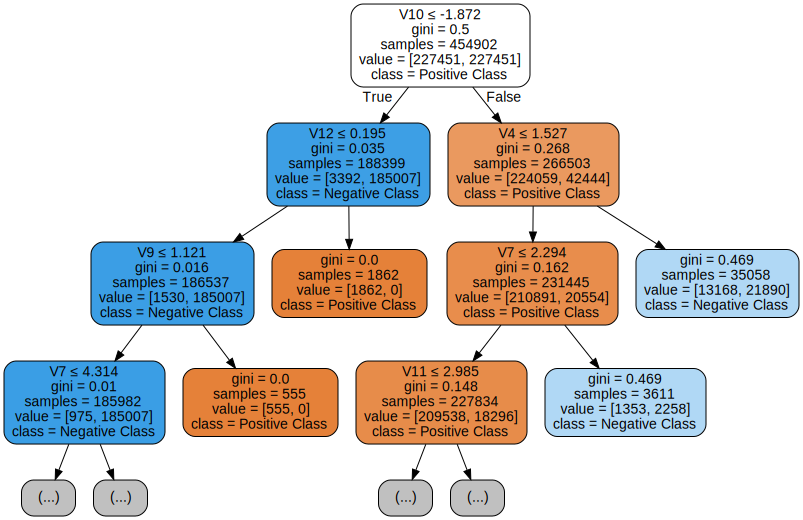

In [75]:
# Visualizing the decision Tree
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

#### 2.1.3. Random Forest model

In [69]:
# Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[6,7,8,9],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5], 
                    'max_features':['auto','sqrt'],
                    'min_samples_leaf':[10, 25, 50, 75],
                    'n_estimators':[5,30,50,80,100],
                    'max_leaf_nodes':[50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_rantrain, y_rantrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.2min finished


Time taken to complete random search:  0:15:44.424528


In [70]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score 
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9, max_leaf_nodes=500, min_samples_leaf=50,
                       min_samples_split=3, n_estimators=80, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9998712414960064



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:01:35.730636


Accuracy in train dataset: 0.9921389661949167
Accuracy in test dataset: 0.9986657771847899
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.309978


---------------------
|      F1 Score      |
---------------------

    0.9986657771847899


---------------------
|      Accuracy      |
---------------------

    0.9986657771847899


---------------------
|      Recall        |
---------------------

    0.8775510204081632


---------------------
|      ROC AUC       |
---------------------

    0.9819090375317262


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.88      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94    

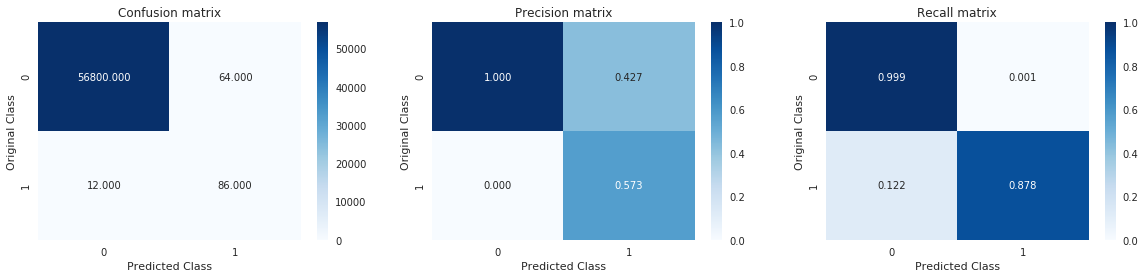

In [71]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
rf_grid_results, trained_model =  model_report(rsearch_cv, X_rantrain, y_rantrain, X_test_pt_df, y_test, class_labels= y_rantrain)

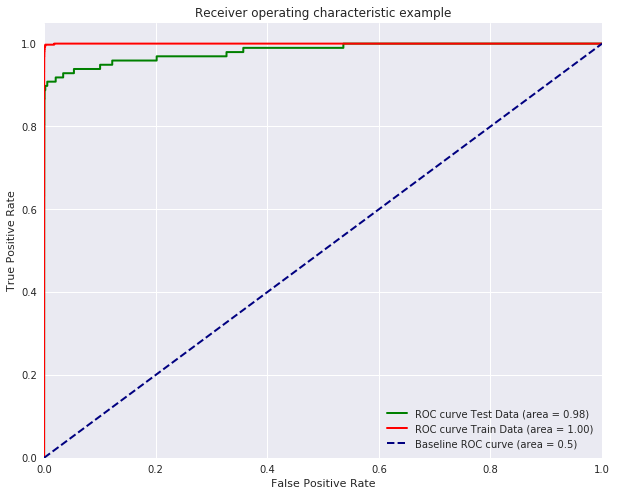

In [72]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_rantrain, y_rantrain)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_rantrain, y_rantrain, X_test_pt_df, y_test)

#### 2.1.4. XGBoost model

In [80]:
## Building an XGBoost model
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01],
                    'n_estimators':[10,100,250,500,750],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7],
                    'max_depth': [6,7,9],
                    'colsample_bytree':[0.7,0.8],
                    'gamma':[0.5,1]}

model = XGBClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_rantrain, y_rantrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 202.0min finished


Time taken to complete random search:  3:31:39.902210


In [81]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 750, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}

---------------------------------
|   No of CrossValidation sets   |
-----------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:13:51.081661


Accuracy in train dataset: 0.9999912068973098
Accuracy in test dataset: 0.9996137776061234
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.969039


---------------------
|      F1 Score      |
---------------------

    0.9996137776061234


---------------------
|      Accuracy      |
---------------------

    0.9996137776061234


---------------------
|      Recall        |
---------------------

    0.8367346938775511


---------------------
|      ROC AUC       |
---------------------

    0.9835420064199005


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92    

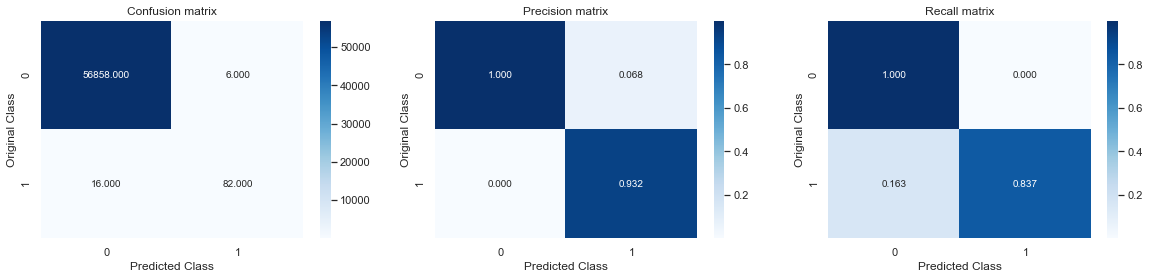

In [83]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_rantrain, y_rantrain, X_test_pt_df, y_test, class_labels= y_rantrain)

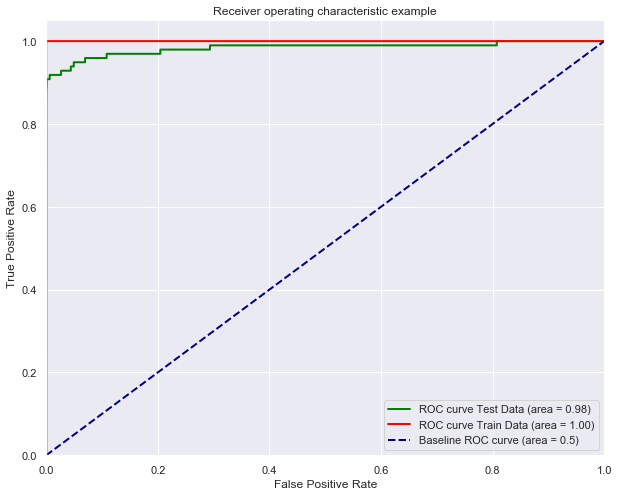

In [84]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_rantrain, y_rantrain)

#Plot the ROC curve 
plot_roc_curve(sig_clf, X_rantrain, y_rantrain, X_test_pt_df, y_test)

In [85]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 97.29%          91.84%       0.9806
Decision Trees Classifier  : 92.35%          90.82%       0.9364
Random Forest Classifier   : 99.91%           87.76%       0.985
XGBoost Classifier         : 99.96%          83.67%       0.9835


### Summary From Models on Build Balanced Data Using Random Over Sampling:
#### Build different models on the balanced dataset  using Random Oversampling now lets see the results

1. Logistic Regression --
    
    - Accuracy: Train - 95.14% , Test - 97.22%
    - Recall: 91.83%
    - F1 Score: 97.22%
    - ROC AUC: 97.30%
    - AUC: Train - 0.99 ,test- 0.97


2. Decision Tree -- 
    
    - Accuracy: Train - 92.16% , Test - 89.91%  
    - Recall: 90.81%
    - F1 Score: 89.91% 
    - ROC AUC: 93.99%
    - AUC: Train - 0.98 ,test- 0.94


3. Random Forest -- 
   
    - Accuracy: Train - 99.21% , Test - 99.86%  
    - Recall: 87.75%
    - F1 Score: 99.86%
    - ROC AUC: 98.19%
    - AUC: Train - 1 ,test- 0.98
    

4. XGboost --
    
    - Accuracy: Train - 99.99% , Test - 99.96%
    - Recall: 83.67% 
    - F1 Score: 99.96%
    - ROC AUC: 98.35%
    - AUC: Train - 1 ,test- 0.92

#### 2.2. SMOTE 

#### Sample the Imbalanced data using Smote

In [73]:
from imblearn.over_sampling import SMOTE
Osm = SMOTE(random_state = 0, n_jobs = -1)
X_smotetrain,y_smotetrain= Osm.fit_sample(X_train_pt_df,y_train)

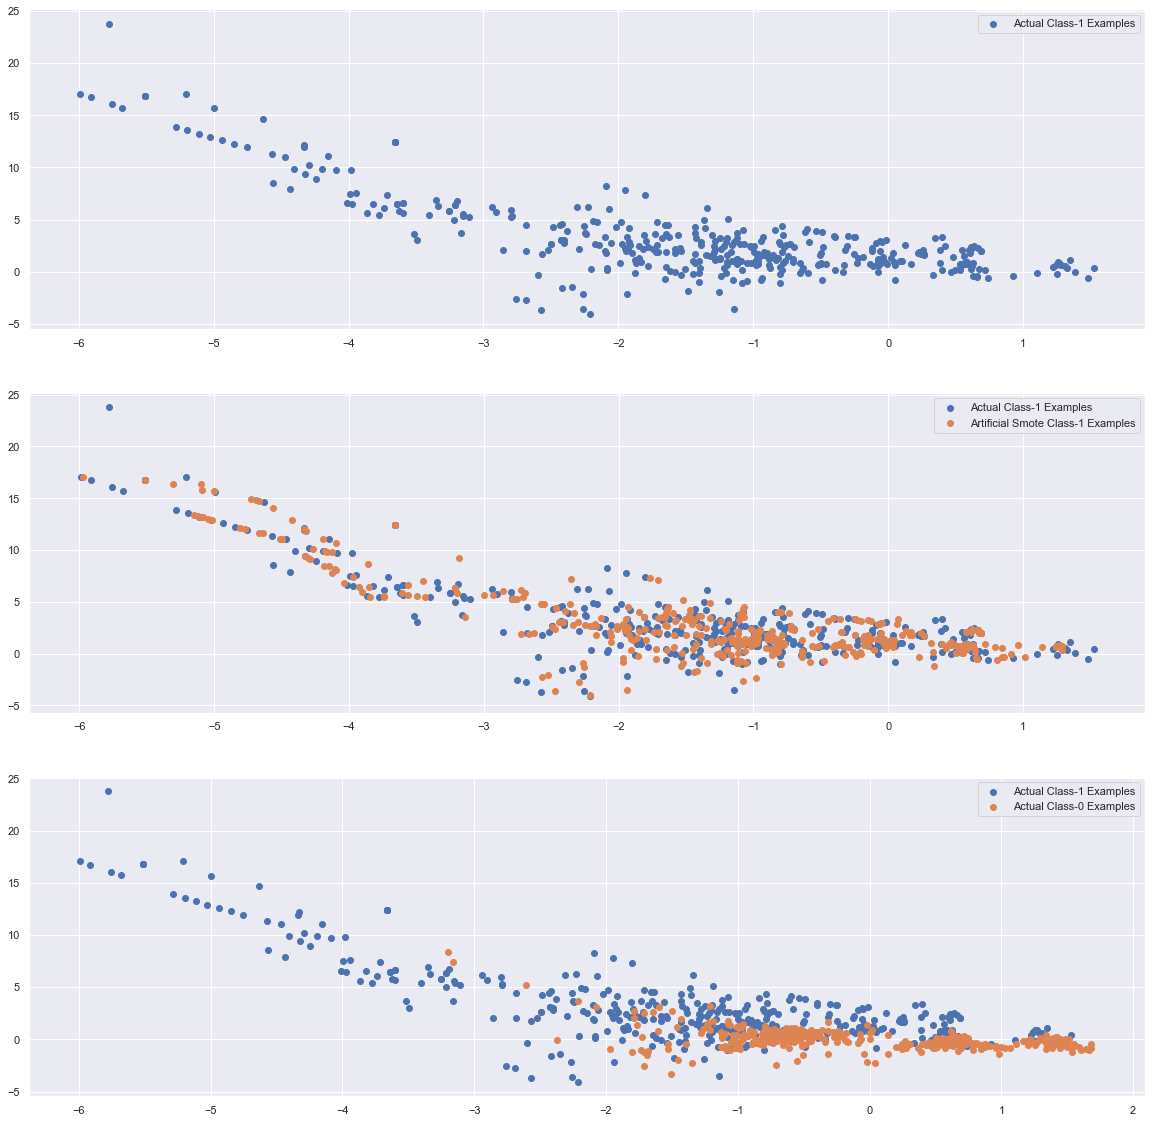

In [87]:
X_smotetrain_1 = X_smotetrain[X_train_pt_df.shape[0]:].values

X_train_1 = X_train_pt_df.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt_df.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smotetrain_1[:X_train_1.shape[0], 0], X_smotetrain_1[:X_train_1.shape[0], 1],
            label='Artificial Smote Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 2.2.1. Logistic Regression Model

In [74]:
## building the regression model, we are using the grid search method to get the best combination of values, C values used for cross validation
st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } 

model = LogisticRegression(n_jobs=-1, random_state= state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state= state)
rsearch_cv.fit(X_smotetrain,y_smotetrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.5s finished


Time taken to complete random search:  0:00:22.663681


In [75]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=71.96856730011514, n_jobs=-1, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 71.96856730011514}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.990786732449144



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:09.069073


Accuracy in train dataset: 0.949780392260311
Accuracy in test dataset: 0.9707699870088831
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.004103


---------------------
|      F1 Score      |
---------------------

    0.9707699870088831


---------------------
|      Accuracy      |
---------------------

    0.9707699870088831


---------------------
|      Recall        |
---------------------

    0.9183673469387755


---------------------
|      ROC AUC       |
---------------------

    0.971557809252007


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      

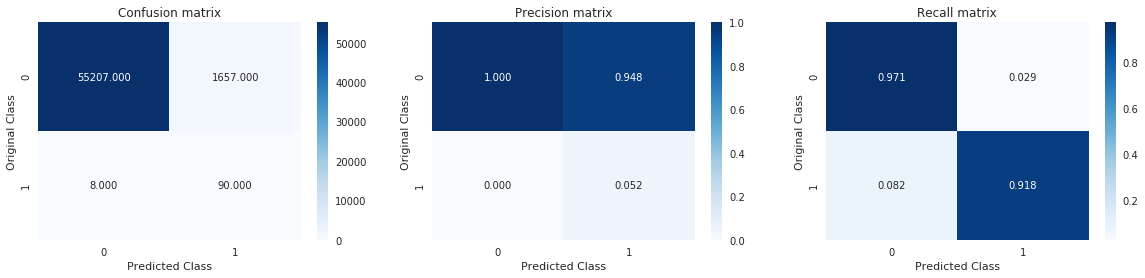

In [76]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
rf_grid_results, trained_model =  model_report(rsearch_cv, X_smotetrain,y_smotetrain, X_test_pt_df, y_test, class_labels=y_smotetrain)

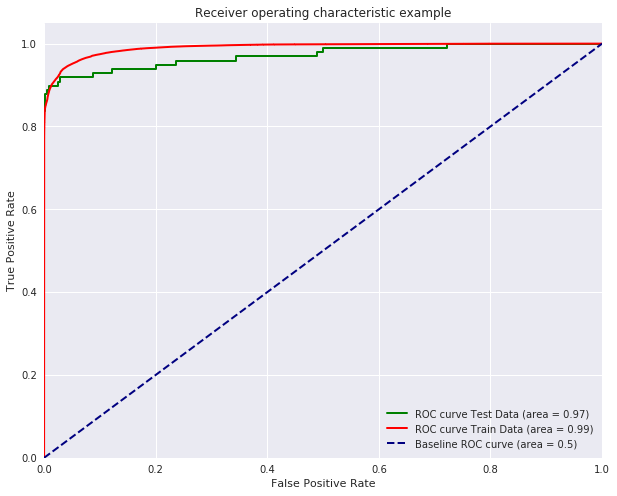

In [77]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_smotetrain,y_smotetrain)

#Plot the ROC curve
plot_roc_curve(sig_clf,X_smotetrain,y_smotetrain, X_test_pt_df, y_test)

#### 2.2.2. Decision Tree model

In [78]:
## Building an Decision Tree model
from sklearn.tree import DecisionTreeClassifier
st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_smotetrain,y_smotetrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.8s finished


Time taken to complete random search:  0:00:18.846143


In [79]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.30000000000000004, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9676856021578027



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:02.032330


Accuracy in train dataset: 0.912447076513183
Accuracy in test dataset: 0.9176292967241318
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.006045


---------------------
|      F1 Score      |
---------------------

    0.9176292967241318


---------------------
|      Accuracy      |
---------------------

    0.9176292967241318


---------------------
|      Recall        |
---------------------

    0.9081632653061225


---------------------
|      ROC AUC       |
---------------------

    0.9535471493746627


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91     

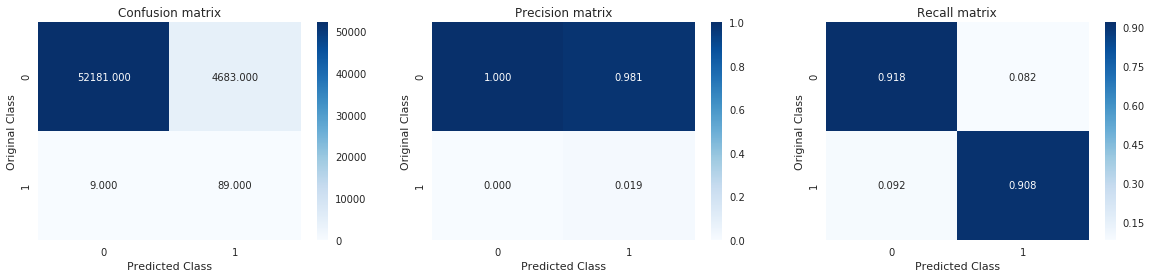

In [80]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
dt_grid_results, trained_model =  model_report(rsearch_cv, X_smotetrain,y_smotetrain, X_test_pt_df, y_test, class_labels=y_smotetrain)

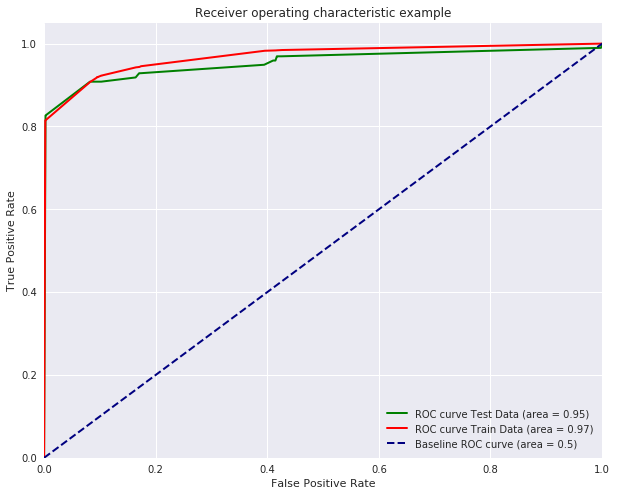

In [81]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_smotetrain,y_smotetrain)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_smotetrain,y_smotetrain, X_test_pt_df, y_test)

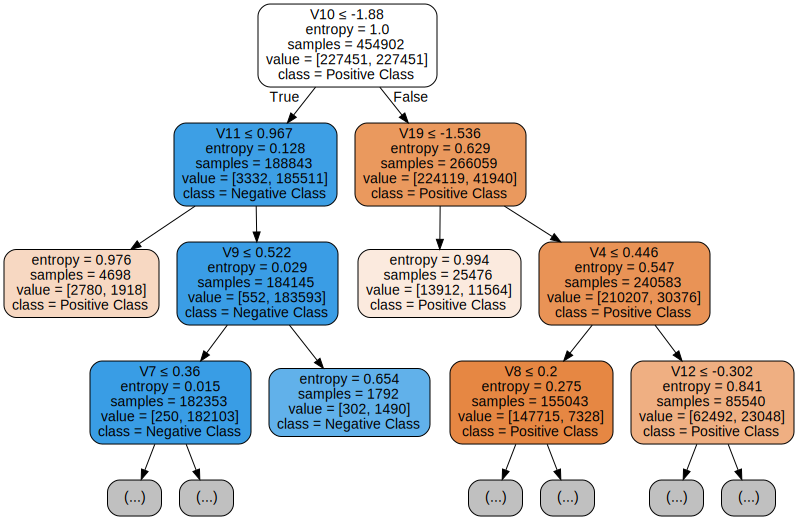

In [96]:
# Visualizing the decision Tree
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

#### 2.2.3. Random Forest model

In [82]:
# Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[6,7,8,9],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5], 
                    'max_features':['auto','sqrt'],
                    'min_samples_leaf':[10, 25, 50, 75],
                    'n_estimators':[5,30,50,80,100],
                    'max_leaf_nodes':[50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_smotetrain,y_smotetrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.8min finished


Time taken to complete random search:  0:24:20.146347


In [83]:
## printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score 
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9, max_leaf_nodes=500, min_samples_leaf=50,
                       min_samples_split=3, n_estimators=80, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9990638233530138



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:02:38.162720


Accuracy in train dataset: 0.984440604789603
Accuracy in test dataset: 0.9969804431024192
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.350983


---------------------
|      F1 Score      |
---------------------

    0.9969804431024192


---------------------
|      Accuracy      |
---------------------

    0.9969804431024192


---------------------
|      Recall        |
---------------------

    0.8775510204081632


---------------------
|      ROC AUC       |
---------------------

    0.978560195181055


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.88      0.50        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      

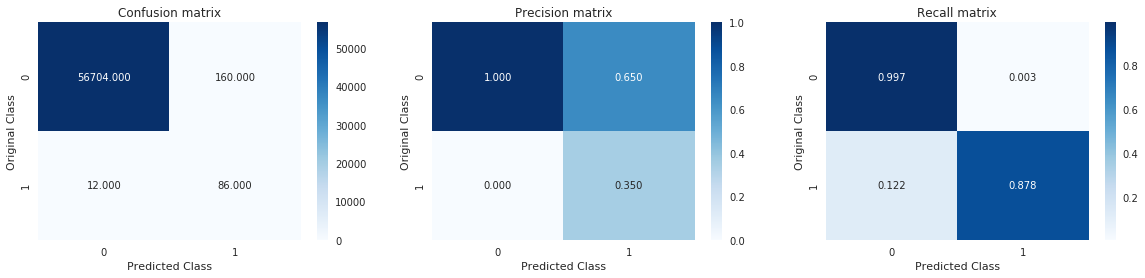

In [84]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
rf_grid_results, trained_model =  model_report(rsearch_cv,X_smotetrain,y_smotetrain, X_test_pt_df, y_test, class_labels=y_smotetrain)

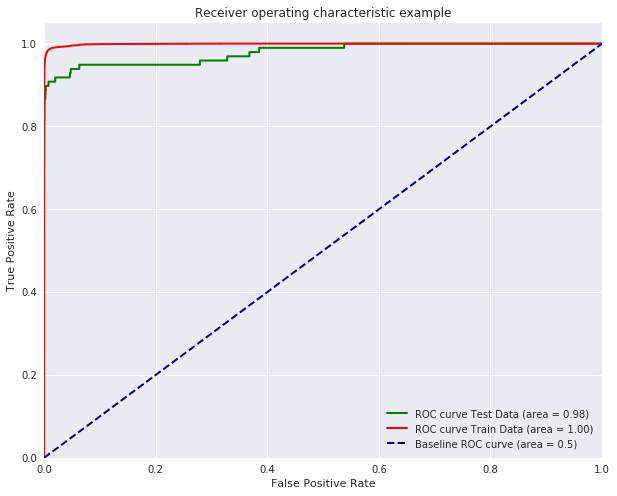

In [85]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_smotetrain,y_smotetrain)

#Plot the ROC curve
plot_roc_curve(sig_clf,X_smotetrain,y_smotetrain, X_test_pt_df, y_test)

#### 2.2.4. XGBoost model

In [101]:
## Building an XG BOOST model
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01],
                    'n_estimators':[250,500,750],
                    'max_depth': [6,7,9]}

model = XGBClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_smotetrain,y_smotetrain)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 131.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 398.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 398.7min finished


Time taken to complete random search:  7:07:30.104058


In [102]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 750, 'max_depth': 7, 'learning_rate': 0.1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

----------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:28:11.881135


Accuracy in train dataset: 1.0
Accuracy in test dataset: 0.9994557775359011
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:02.465977


---------------------
|      F1 Score      |
---------------------

    0.9994557775359011


---------------------
|      Accuracy      |
---------------------

    0.9994557775359011


---------------------
|      Recall        |
---------------------

    0.8367346938775511


---------------------
|      ROC AUC       |
---------------------

    0.9888865700331906


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     5696

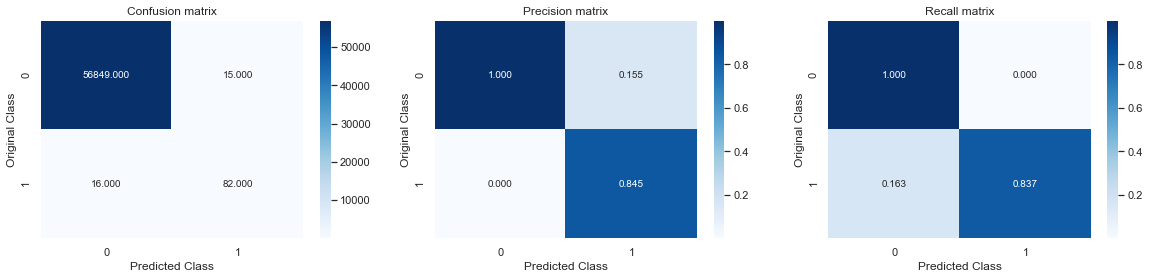

In [103]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_smotetrain,y_smotetrain, X_test_pt_df, y_test, class_labels=y_smotetrain)

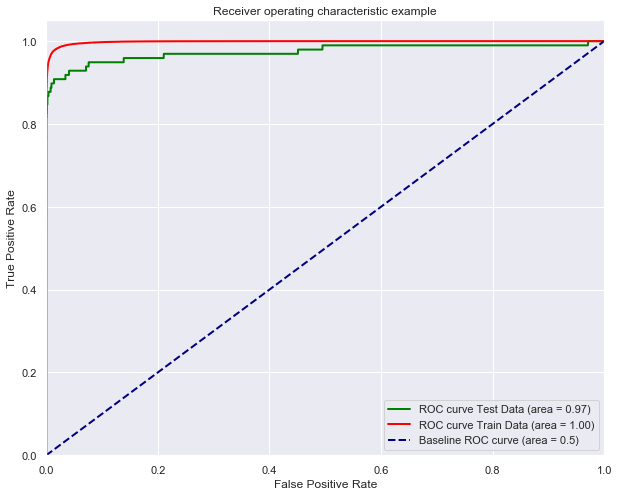

In [104]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_smotetrain,y_smotetrain, X_test_pt_df, y_test)

In [105]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 97.29%          91.84%       0.9806
Decision Trees Classifier  : 99.71%          77.55%       0.96
Random Forest Classifier   : 99.64%           88.78%       0.9886
XGBoost Classifier         : 99.95%          83.67%       0.9889


### Summary From Models on Build Balanced Data Using SMOTE:
#### Build different models on the balanced dataset using SMOTE technique now lets see the results

1. Logistic Regression --
    
    - Accuracy: Train - 94.97% , Test - 97.07%
    - Recall: 91.83%
    - F1 Score: 97.07%
    - ROC AUC: 97.15%
    - AUC: Train - 0.99 ,test- 0.97


2. Decision Tree -- 
    
    - Accuracy: Train - 91.24% , Test - 91.76%  
    - Recall: 90.81%
    - F1 Score: 91.76% 
    - ROC AUC: 95.35%
    - AUC: Train - 0.97 ,test- 0.95


3. Random Forest -- 
   
    - Accuracy: Train - 98.45% , Test - 99.69%  
    - Recall: 87.75%
    - F1 Score: 99.69%
    - ROC AUC: 97.85%
    - AUC: Train - 1 ,test- 0.97
    

4. XGboost --
    
    - Accuracy: Train - 100% , Test - 99.94%
    - Recall: 83.67% 
    - F1 Score: 99.94%
    - ROC AUC: 98.88%
    - AUC: Train - 1 ,test- 0.97

#### 2.3. ADASYN

#### Sample the Imbalanced data using ADASYN

In [86]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN()
X_res, y_res = ada.fit_resample(X_train_pt_df,y_train)

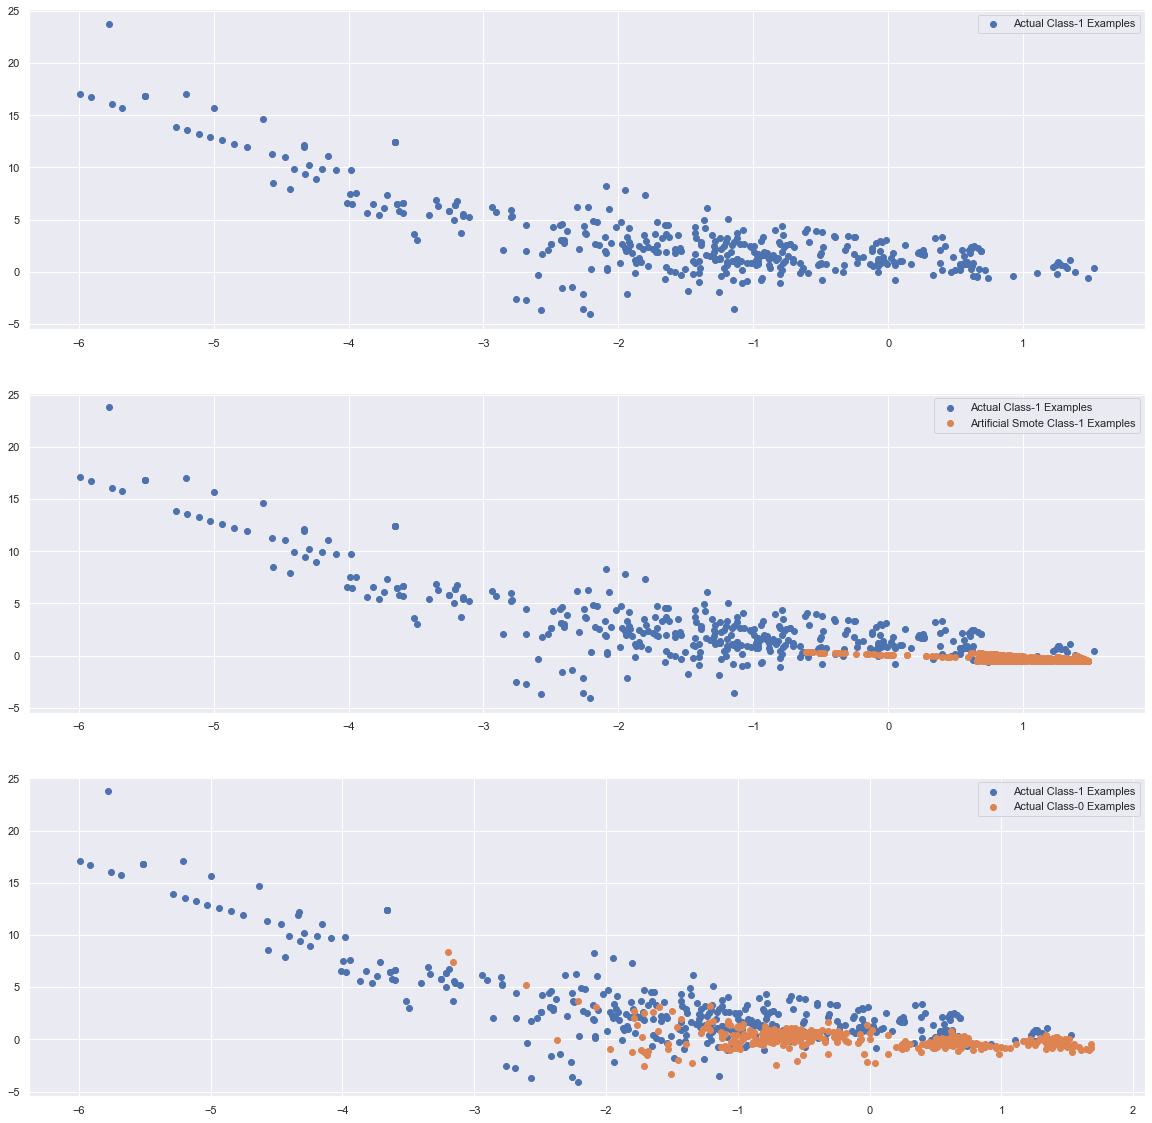

In [107]:
X_res_1 = X_res[X_train_pt_df.shape[0]:].values

X_train_1 = X_train_pt_df.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt_df.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_res_1[:X_train_1.shape[0], 0], X_res_1[:X_train_1.shape[0], 1],
            label='Artificial Smote Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 2.3.1. Logistic Regression Model

In [87]:
## building the regression model, we are using the grid search method to get the best combination of values, C values used for cross validation
st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } 

model = LogisticRegression(n_jobs=-1, random_state= state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state= state)
rsearch_cv.fit(X_res, y_res)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.5s finished


Time taken to complete random search:  0:00:25.828551


In [88]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.05179474679231207, n_jobs=-1, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.05179474679231207}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9590269639789151



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:10.210831


Accuracy in train dataset: 0.9046396398376807
Accuracy in test dataset: 0.9128717390541062
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.004170


---------------------
|      F1 Score      |
---------------------

    0.9128717390541062


---------------------
|      Accuracy      |
---------------------

    0.9128717390541062


---------------------
|      Recall        |
---------------------

    0.9285714285714286


---------------------
|      ROC AUC       |
---------------------

    0.9713950507045812


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92    

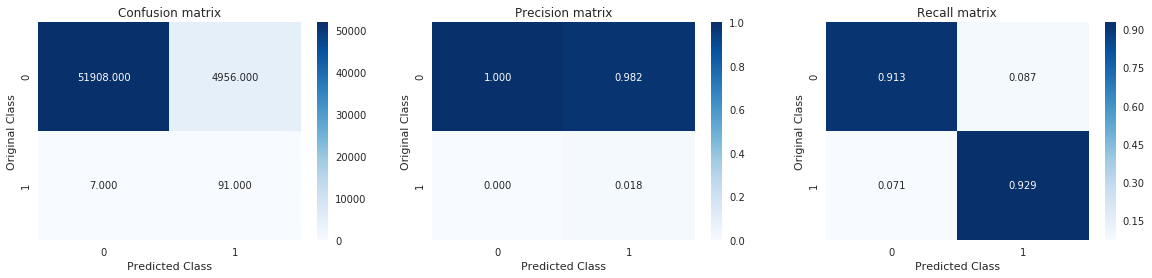

In [89]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
log_reg_grid_results, trained_model =  model_report(rsearch_cv,X_res, y_res, X_test_pt_df, y_test, class_labels=y_res.values)

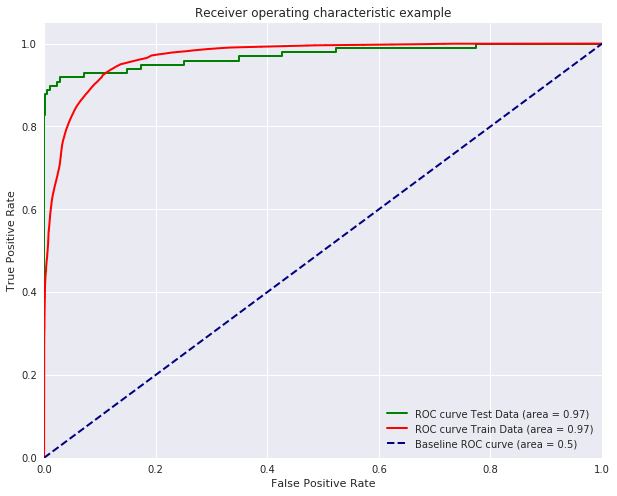

In [90]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_res, y_res)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_res, y_res, X_test_pt_df, y_test)

#### 2.3.2. Decision Tree model

In [91]:
## Building an Decision Tree model
from sklearn.tree import DecisionTreeClassifier
st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_res, y_res)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.5s finished


Time taken to complete random search:  0:00:20.418924


In [92]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_split=0.1, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.1, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8794773612758



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:02.887467


Accuracy in train dataset: 0.8400900405798121
Accuracy in test dataset: 0.8386117060496472
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.007842


---------------------
|      F1 Score      |
---------------------

    0.8386117060496472


---------------------
|      Accuracy      |
---------------------

    0.8386117060496472


---------------------
|      Recall        |
---------------------

    0.9081632653061225


---------------------
|      ROC AUC       |
---------------------

    0.9650031439137277


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     56864
           1       0.01      0.91      0.02        98

    accuracy                           0.84     56962
   macro avg       0.50      0.87    

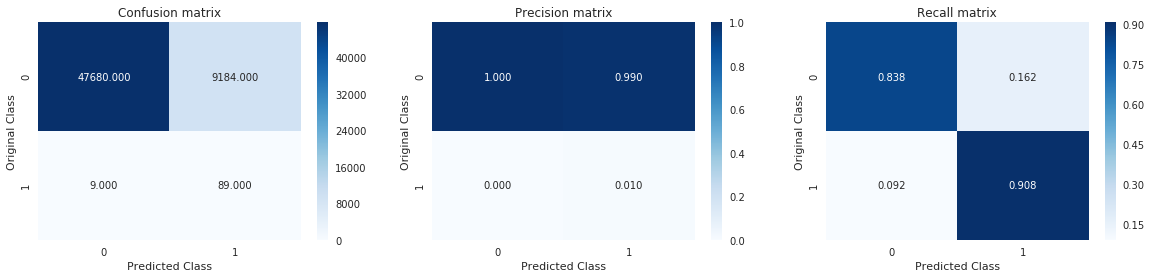

In [93]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
dt_grid_results, trained_model =  model_report(rsearch_cv, X_res, y_res, X_test_pt_df, y_test, class_labels=y_res)

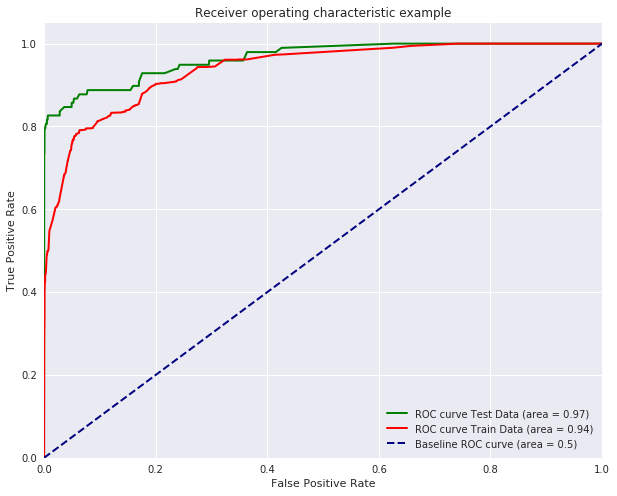

In [94]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_res, y_res)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_res, y_res, X_test_pt_df, y_test)

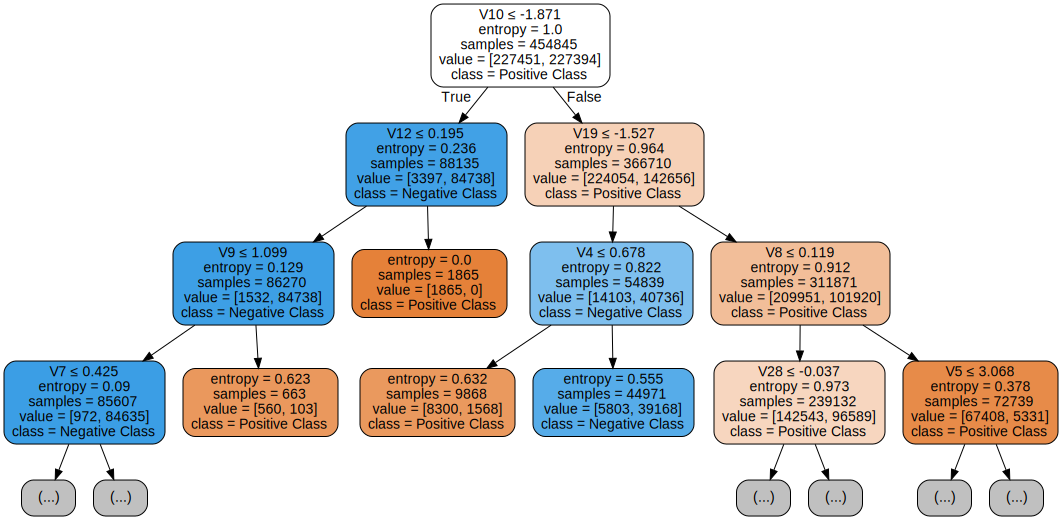

In [116]:
# Visualizing the decision Tree
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

#### 2.3.3. Random Forest model

In [95]:
# Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[6,7,8,9],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5], 
                    'max_features':['auto','sqrt'],
                    'min_samples_leaf':[10, 25, 50, 75],
                    'n_estimators':[5,30,50,80,100],
                    'max_leaf_nodes':[50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_res, y_res)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.2min finished


Time taken to complete random search:  0:23:30.642992


In [96]:
## printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score 
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9, max_leaf_nodes=500, min_samples_leaf=50,
                       min_samples_split=3, n_estimators=80, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9876597188185826



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:02:18.427239


Accuracy in train dataset: 0.9891076398200948
Accuracy in test dataset: 0.9847793265685896
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.343324


---------------------
|      F1 Score      |
---------------------

    0.9847793265685896


---------------------
|      Accuracy      |
---------------------

    0.9847793265685896


---------------------
|      Recall        |
---------------------

    0.9081632653061225


---------------------
|      ROC AUC       |
---------------------

    0.9802812726103385


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95    

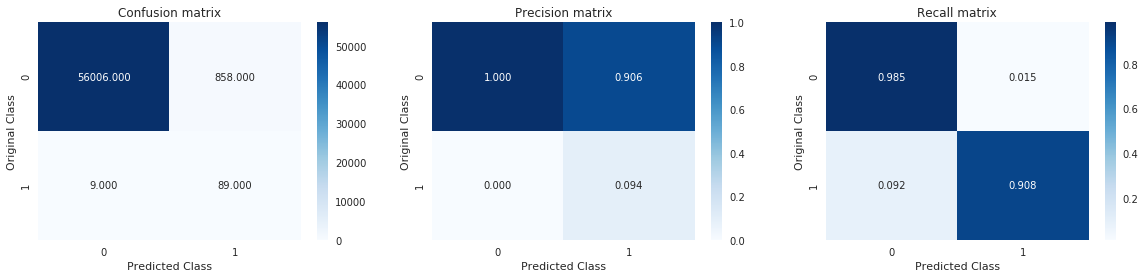

In [97]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
rf_grid_results, trained_model =  model_report(rsearch_cv, X_res, y_res, X_test_pt_df, y_test, class_labels=y_res)

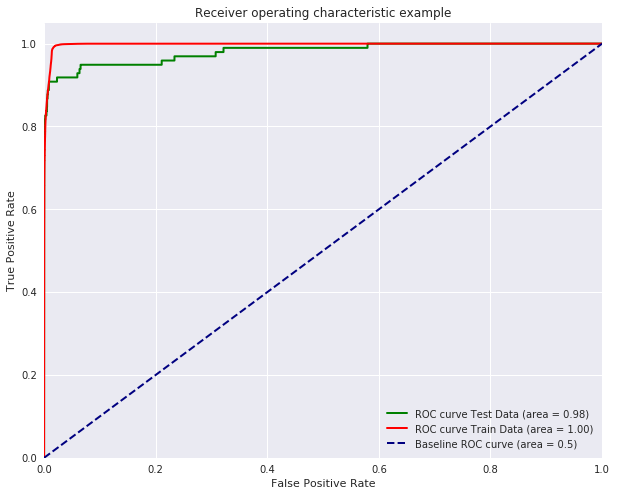

In [98]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_res, y_res)

#Plot the ROC curve
plot_roc_curve(sig_clf,X_res, y_res, X_test_pt_df, y_test)

#### 2.2.4. XGBoost model

In [121]:
## Building an XGBoost model
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01],
                    'n_estimators':[10,100,250,500,750],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7],
                    'max_depth': [6,7,9],
                    'colsample_bytree':[0.7,0.8],
                    'gamma':[0.5,1]}

model = XGBClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_res, y_res)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 148.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 148.9min finished


Time taken to complete random search:  2:39:16.713444


In [122]:
# printing the value for best estimators, Best parameters, No of CrossValidation sets and Best Score
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.7}

---------------------------------
|   No of CrossValidation sets   |
-------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:11:08.645689


Accuracy in train dataset: 0.999989007244226
Accuracy in test dataset: 0.999403110845827
Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:01.029248


---------------------
|      F1 Score      |
---------------------

    0.999403110845827


---------------------
|      Accuracy      |
---------------------

    0.999403110845827


---------------------
|      Recall        |
---------------------

    0.8469387755102041


---------------------
|      ROC AUC       |
---------------------

    0.9917837439562206


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.

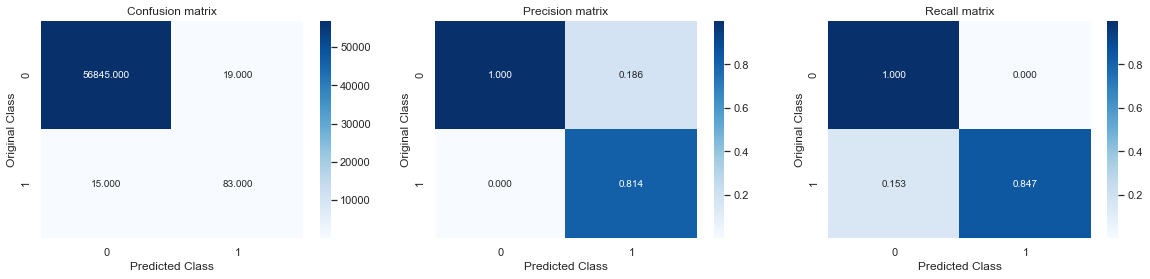

In [124]:
# printing the best value for F1 score, accuracy, ROC-AUC, Recall and a confuion matrix plot
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_res, y_res, X_test_pt_df, y_test, class_labels=y_res.values)

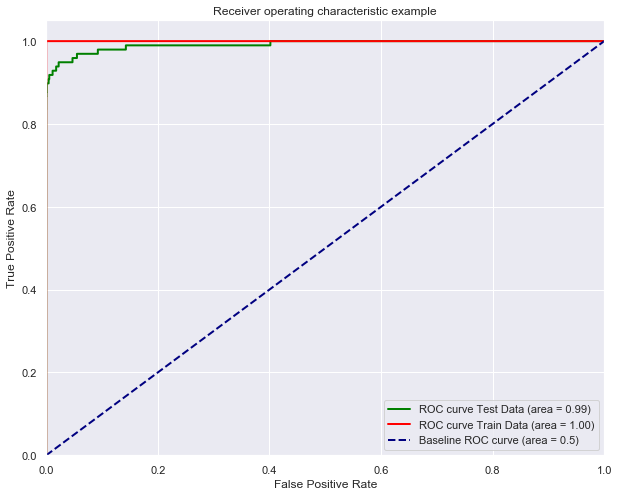

In [125]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_res, y_res)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_res, y_res, X_test_pt_df, y_test)

In [126]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 90.74%          94.9%       0.9782
Decision Trees Classifier  : 87.97%          87.76%       0.9714
Random Forest Classifier   : 98.3%           88.78%       0.9895
XGBoost Classifier         : 99.94%          84.69%       0.9918


### Summary From Models on Build Balanced Data Using ADASYN:
#### Build different models on the balanced dataset using ADASYN now lets see the results

1. Logistic Regression --
    
    - Accuracy: Train - 90.46% , Test - 91.28%
    - Recall: 92.85%
    - F1 Score: 91.28%
    - ROC AUC: 97.13%
    - AUC: Train - 0.97 ,test- 0.97


2. Decision Tree -- 
    
    - Accuracy: Train - 84.00% , Test - 83.86%  
    - Recall: 90.81%
    - F1 Score: 83.86% 
    - ROC AUC: 96.50%
    - AUC: Train - 0.94 ,test- 0.97


3. Random Forest -- 
   
    - Accuracy: Train - 98.91% , Test - 98.47%  
    - Recall: 90.81%
    - F1 Score: 98.47%
    - ROC AUC: 98.02%
    - AUC: Train - 1 ,test- 0.99
    

4. XGboost --
    
    - Accuracy: Train - 99.99% , Test - 99.94%
    - Recall: 84.69% 
    - F1 Score: 99.94%
    - ROC AUC: 99.17%
    - AUC: Train - 1 ,test- 0.99

### Most Important Features For Best Model

Top var = 14
2nd Top var = 4
3rd Top var = 10


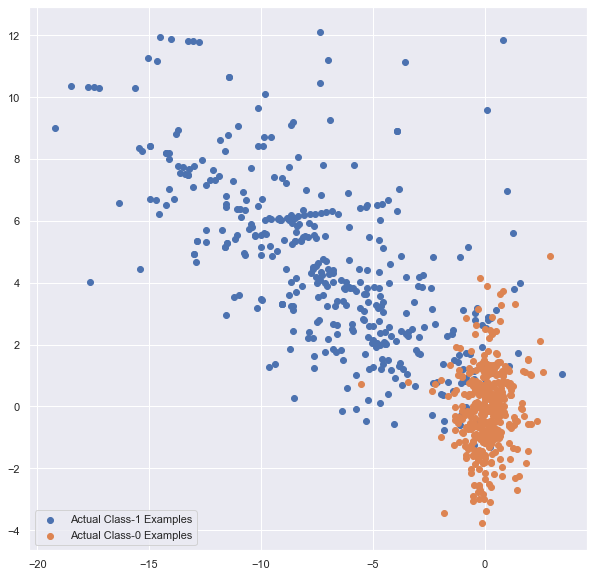

In [127]:
importance=rsearch_cv.best_estimator_.feature_importances_
var_imp = []
for i in importance:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(importance)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(importance)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(importance)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(importance)[-1])
second_top_var_index = var_imp.index(np.sort(importance)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Selection:
### Overall conclusion after running models on Imbalance and Balanced Data set:
1.  Model Building on imbalanced dataset
        1.1  Logistic Regression
        1.2  DecisionTree Classification
        1.3  RandomForest Classification
        1.4  XGB Classification


2.  Model building with balancing Classes
    
    2.1  Random Oversampling
        2.1.1  Logistic Regression
        2.1.2  DecisionTree Classification
        2.1.3  Random Forest Classifier
        2.1.4  XGB Classification

    2.2  Applying SMOTE
        2.2.1  Logistic Regression
        2.2.2  DecisionTree Classification
        2.2.3  Random Forest Classifier
        2.2.4  XGB Classification

    2.3  Applying ADASYN
        2.3.1  Logistic Regression
        2.3.2  DecisionTree Classification
        2.3.3  Random Forest Classifier
        2.3.4  XGB Classification

We Build Total 16 Models 4 with imbalanced dataset and 12 with balancing Classes

#### Hence from the Analysis we can see that

- No Sampling: If we don't do the sampling even though the accuracy is good but the recall is very bad.
- UnderSampling: With respect to Under Sampling technique even though the output which we getting is good, but there is huge loos of data in it,
- Random OverSampling: When we come to random over sampling we are not creating any new datapoints we are just repeting the same datapoints again and again
- SMOTE: with respect to SMOTE we are actually creating new datapoints with respect to minority class, and the output which we are getting is slightly good compared to other.
- ADASYN: With respect to ADASYN the process is similar to SMOTE but here it also takes density into issue with respect to minority class and it focuses on the datapoints which are hard to predict.

With respect to Logistic Regression with ADASYN sampling technique we are getting good Recall score.

with respect to Logistic Regression with SMOTE sampling technique we are getting good Recall score and good accuracy value also.

With respect to all other techniques SMOTE and ADASYS sampling technique we get good result compared to all other sampling techniques. Where as without sampling the result is worst.



#### Best model selection considering overall analysis:
- XGBoost performs well for prediction with and without balancing technique
- Looking at above results it seems XGBOOST model with SMOTE and ADASYN Balancing techniques has provided best results. So we can try to tune the hyperparameters of this model to get best results
- We have selected XGBOOST Classifier with ADASYN Balancing technique 
    - XGBOOST Model Over all Accuracy: 99.94%
    - Train Accuracy - 99.99% , Test  Accuracy- 99.94%
    - Recall: 84.69%
    - F1 Score: 99.94%
    - ROC AUC: 99.17%
    - AUC: Train - 1 ,test- 0.99

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, you can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.


For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So consider the losses if the missed transaction was a high-value fraudulent one, for e.g., a transaction of $10,000?


So here, to save banks from high-value fraudulent transactions, we had focused on a high recall in order to detect actual fraudulent transactions.